In [1]:
import csv
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from datetime import datetime, date
import warnings
warnings.filterwarnings("ignore")

In [2]:
nodes = pd.read_csv('UofT_nodes.csv')

In [3]:
nodes.head(50)

BIRTH_DT CUST_ADD_DT  OCPTN_NM  RES_CNTRY_CA  CNTRY_OF_INCOME_CA  \
0   1981-09-01  2007-07-05      89.0             1                   1   
1   1994-02-21  2019-05-19      89.0             1                   1   
2   1962-11-16  2011-08-02      89.0             1                   1   
3   1998-06-20  2001-08-15      89.0             1                   1   
4   1942-01-24  2012-10-28      89.0             1                   1   
5   1969-05-22  2011-10-03      89.0             1                   1   
6   1951-03-31  2007-08-07      89.0             1                   1   
7   1986-08-26  2012-11-26      89.0             1                   1   
8   2002-06-24  2012-11-28      89.0             1                   1   
9   1968-01-13  1997-12-23      89.0             1                   1   
10  1957-11-11  2020-06-24      89.0             1                   1   
11  2007-06-26  2010-10-14      89.0             1                   1   
12  1968-10-11  2001-11-05      89.0             1                   1   
13  1978-12-20  2020-08-13      89.0             1                   1   
14  1981-03-05  2005-12-06      89.0             1                   1   
15  1979-06-18  2011-05-19      89.0             1                   1   
16  1977-03-27  2001-08-16      89.0             1                   1   
17  1950-07-16  1992-01-01      89.0             1                   1   
18  1956-07-06  1993-12-09      89.0             1                   1   
19  1989-10-21  1994-06-15      89.0             1                   1   
20  1984-08-20  2008-02-10      89.0             1                   1   
21  1994-01-16  1997-02-01      89.0             1                   1   
22  1951-10-10  2002-10-27      89.0             1                   1   
23  1990-05-16  2006-12-04      89.0             1                   1   
24  1945-02-21  1982-03-14      89.0             1                   1   
25  1945-09-30  1997-04-17      89.0             1                   1   
26  1955-09-15  1982-01-01      89.0             1                   1   
27  2003-01-23  2013-03-17      89.0             1                   1   
28  1952-07-13  2011-01-15      89.0             1                   1   
29  1969-08-09  2003-09-27      89.0             1                   1   
30  1988-09-01  2014-08-31      89.0             1                   1   
31  1926-11-15  1993-06-16      89.0             1                   1   
32  1958-11-15  1992-03-24      89.0             1                   1   
33  1977-09-27  1994-04-22      89.0             1                   1   
34  1966-11-29  2010-07-19      89.0             1                   1   
35  1984-05-12  2007-01-01      89.0             1                   1   
36  1947-09-05  1988-08-13      89.0             1                   1   
37  1966-03-07  2002-12-13      89.0             1                   1   
38  1957-03-26  2004-09-15      89.0             1                   1   
39  1950-07-09  2010-05-02      89.0             1                   1   
40  1966-09-09  1987-08-20      89.0             1                   1   
41  1957-01-07  2000-03-07      89.0             1                   1   
42  1958-08-21  2000-12-20      89.0             1                   1   
43  1980-10-06  2004-11-20      89.0             1                   1   
44  1966-11-26  2012-02-03      89.0             1                   1   
45  1995-07-28  2009-01-12      89.0             1                   1   
46  1979-10-04  2017-06-10      89.0             1                   1   
47  2009-01-09  2016-01-18      89.0             1                   1   
48  1992-11-28  2020-04-20      89.0             1                   1   
49  1967-03-04  1998-11-09      89.0             1                   1   

    PEP_FL  CASH_SUM_IN  CASH_CNT_IN  CASH_SUM_OUT  CASH_CNT_OUT  \
0      0.0     2577.785          2.0      2851.663           7.0   
1      0.0     3035.502          2.0      4805.997          15.0   
2      0.0     1617.571    

In [4]:
occupation = pd.read_csv('UofT_occupation_risk.csv')

In [5]:
occupation.head(50)

code occupation_risk
0      0             Low
1      1            High
2      2             Low
3      3             Low
4      4             Low
5      5             Low
6      6             Low
7      7        Moderate
8      8             Low
9      9             Low
10    10             Low
11    11            High
12    12            High
13    13             Low
14    14             Low
15    15            High
16    16             Low
17    17            High
18    18             Low
19    19             Low
20    20            High
21    21             Low
22    22             Low
23    23             Low
24    24             Low
25    25             Low
26    26            High
27    27             Low
28    28            High
29    29             Low
30    30             Low
31    31             Low
32    32             Low
33    33             Low
34    34             Low
35    35             Low
36    36             Low
37    37             Low
38    38             Low
39    39            High
40    40             Low
41    41             Low
42    42             Low
43    43             Low
44    44        Moderate
45    45            High
46    46             Low
47    47            High
48    48            High
49    49        Moderate

In [6]:
merged_df = pd.merge(nodes, occupation, left_on = 'OCPTN_NM', right_on = 'code', how = 'left')

In [7]:
#pd.set_option('display.max_columns', None)

In [8]:
merged_df

BIRTH_DT CUST_ADD_DT  OCPTN_NM  RES_CNTRY_CA  CNTRY_OF_INCOME_CA  \
0       1981-09-01  2007-07-05      89.0             1                   1   
1       1994-02-21  2019-05-19      89.0             1                   1   
2       1962-11-16  2011-08-02      89.0             1                   1   
3       1998-06-20  2001-08-15      89.0             1                   1   
4       1942-01-24  2012-10-28      89.0             1                   1   
...            ...         ...       ...           ...                 ...   
999995  1939-01-16  1994-03-19     467.0             0                   1   
999996  1970-12-13  1995-12-22     467.0             0                   1   
999997  1958-09-09  2010-11-03      65.0             0                   1   
999998  1983-09-15  2013-01-30     231.0             0                   1   
999999  1962-01-23  2017-03-07      89.0             0                   0   

        PEP_FL  CASH_SUM_IN  CASH_CNT_IN  CASH_SUM_OUT  CASH_CNT_OUT  ...  \
0          0.0     2577.785          2.0      2851.663           7.0  ...   
1          0.0     3035.502          2.0      4805.997          15.0  ...   
2          0.0     1617.571          1.0      3482.809          11.0  ...   
3          0.0     3587.042          5.0      1940.943           8.0  ...   
4          0.0     1725.524          2.0     13197.169          43.0  ...   
...        ...          ...          ...           ...           ...  ...   
999995     0.0    18945.108         10.0     32210.000          21.0  ...   
999996     0.0     5775.601          7.0      5015.741          15.0  ...   
999997     0.0     2351.255          2.0     15997.000          19.0  ...   
999998     0.0    27312.613          8.0      3399.000           5.0  ...   
999999     0.0     1421.363          1.0      1276.000           1.0  ...   

        WIRES_SUM_OUT  WIRES_CNT_OUT  COUNTRY_RISK_INCOME  \
0             24244.0           35.0                  Low   
1            196439.0          152.0                  Low   
2             33598.0           20.0                  Low   
3            105896.0          238.0                  Low   
4            187403.0          180.0                  Low   
...               ...            ...                  ...   
999995      2550098.0          174.0                  Low   
999996       417992.0          337.0                  Low   
999997       948981.0          124.0                  Low   
999998       376429.0           12.0                  Low   
999999       617628.0           12.0                 High   

        COUNTRY_RISK_RESIDENCY  RISK                            NAME  GENDER  \
0                          Low   low    Young, Marie Mildren Coleman  Female   
1                          Low   low                Mark Stupar Lecy    Male   
2                          Low   low      Dean Glasper Wendel Reeves    Male   
3                          Low   low             Hulsey, Linda Rauth  Female   
4                          Low   low      Carolyn Washington Roberts  Female   
...                        ...   ...                             ...     ...   
999995                    High  high               Bret* Dove Gainey    Male   
999996                     Low   low       Anthony Ray Montano Gomez    Male   
999997                    High  high  Bernadette Schofield Pace Mile  Female   
999998                    High  high         Wasson, Russell Terrell    Male   
999999                    High  high                Daniel Mckeighan    Male   

       CUSTOMER_ID   code  occupation_risk  
0         935382.0   89.0             High  
1           2305.0   89.0             High  
2         472403.0   89.0             High  
3         227994.0   89.0             High  
4         418265.0   89.0             High  
...            ...    ...              ...  
999995    420884.0  467.0              Low  
999996    429418.0  467.0              Low  
999997    731360.0   65.0             High  
9999

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   BIRTH_DT                1000000 non-null  object 
 1   CUST_ADD_DT             995822 non-null   object 
 2   OCPTN_NM                993616 non-null   float64
 3   RES_CNTRY_CA            1000000 non-null  int64  
 4   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 5   PEP_FL                  1000000 non-null  float64
 6   CASH_SUM_IN             1000000 non-null  float64
 7   CASH_CNT_IN             1000000 non-null  float64
 8   CASH_SUM_OUT            1000000 non-null  float64
 9   CASH_CNT_OUT            1000000 non-null  float64
 10  WIRES_SUM_IN            1000000 non-null  float64
 11  WIRES_CNT_IN            1000000 non-null  float64
 12  WIRES_SUM_OUT           1000000 non-null  float64
 13  WIRES_CNT_OUT           1000000 non-null  float64
 14  COU

In [10]:
merged_df.describe()

OCPTN_NM    RES_CNTRY_CA  CNTRY_OF_INCOME_CA          PEP_FL  \
count  993616.000000  1000000.000000       1000000.00000  1000000.000000   
mean      381.329028        0.985686             0.98855        0.097489   
std       302.806156        0.118782             0.10639        0.296623   
min         0.000000        0.000000             0.00000        0.000000   
25%        89.000000        1.000000             1.00000        0.000000   
50%       354.000000        1.000000             1.00000        0.000000   
75%       724.000000        1.000000             1.00000        0.000000   
max       840.000000        1.000000             1.00000        1.000000   

          CASH_SUM_IN     CASH_CNT_IN    CASH_SUM_OUT    CASH_CNT_OUT  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean     15062.980362        8.596567    23353.115677       23.146121   
std      20323.375203        8.426340    33337.695394       20.867079   
min          0.000000        0.000000        0.000000        0.000000   
25%       2575.721000        3.000000     3419.478250        8.000000   
50%       5983.672500        6.000000     8001.721500       17.000000   
75%      19206.000000       11.000000    29862.000000       32.000000   
max     188953.000000       79.000000   310117.000000      203.000000   

       WIRES_SUM_IN    WIRES_CNT_IN  WIRES_SUM_OUT   WIRES_CNT_OUT  \
count  1.000000e+06  1000000.000000   1.000000e+06  1000000.000000   
mean   3.411956e+06       85.394548   1.382649e+06      152.431128   
std    5.754767e+06       66.773057   2.165856e+06      120.158287   
min    0.000000e+00        0.000000   0.000000e+00        0.000000   
25%    1.209508e+05       33.000000   1.053308e+05       59.000000   
50%    2.981515e+05       71.000000   2.550340e+05      126.000000   
75%    4.688108e+06      122.000000   1.926422e+06      218.000000   
max    4.781359e+07      605.000000   1.893074e+07     1083.000000   

        CUSTOMER_ID           code  
count  1.000000e+06  993616.000000  
mean   5.003547e+05     381.329028  
std    2.888723e+05     302.806156  
min    0.000000e+00       0.000000  
25%    2.501808e+05      89.000000  
50%    5.003765e+05     354.000000  
75%    7.505282e+05     724.000000  
max    1.000677e+06     840.000000

In [11]:
#change BIRTH_DT into Age
merged_df['BIRTH_DT'] = pd.to_datetime(merged_df['BIRTH_DT'], format='%Y-%m-%d')
merged_df['BIRTH_DT'] = merged_df['BIRTH_DT'].dt.date

today = datetime.now().date()
merged_df['AGE'] = today - merged_df['BIRTH_DT']
merged_df['AGE'] = merged_df['AGE'].dt.days // 365

In [12]:
#change CUST_ADD_DT into date at bank
merged_df['CUST_ADD_DT'] = pd.to_datetime(merged_df['CUST_ADD_DT'], format = '%Y-%m-%d')
merged_df['CUST_ADD_DT'] = merged_df['CUST_ADD_DT'].dt.date

today = datetime.now().date()
merged_df['YEAR_AT_BANK'] = today - merged_df['CUST_ADD_DT']
merged_df['YEAR_AT_BANK'] = merged_df['YEAR_AT_BANK'].dt.days // 365

In [13]:
merged_df

BIRTH_DT CUST_ADD_DT  OCPTN_NM  RES_CNTRY_CA  CNTRY_OF_INCOME_CA  \
0       1981-09-01  2007-07-05      89.0             1                   1   
1       1994-02-21  2019-05-19      89.0             1                   1   
2       1962-11-16  2011-08-02      89.0             1                   1   
3       1998-06-20  2001-08-15      89.0             1                   1   
4       1942-01-24  2012-10-28      89.0             1                   1   
...            ...         ...       ...           ...                 ...   
999995  1939-01-16  1994-03-19     467.0             0                   1   
999996  1970-12-13  1995-12-22     467.0             0                   1   
999997  1958-09-09  2010-11-03      65.0             0                   1   
999998  1983-09-15  2013-01-30     231.0             0                   1   
999999  1962-01-23  2017-03-07      89.0             0                   0   

        PEP_FL  CASH_SUM_IN  CASH_CNT_IN  CASH_SUM_OUT  CASH_CNT_OUT  ...  \
0          0.0     2577.785          2.0      2851.663           7.0  ...   
1          0.0     3035.502          2.0      4805.997          15.0  ...   
2          0.0     1617.571          1.0      3482.809          11.0  ...   
3          0.0     3587.042          5.0      1940.943           8.0  ...   
4          0.0     1725.524          2.0     13197.169          43.0  ...   
...        ...          ...          ...           ...           ...  ...   
999995     0.0    18945.108         10.0     32210.000          21.0  ...   
999996     0.0     5775.601          7.0      5015.741          15.0  ...   
999997     0.0     2351.255          2.0     15997.000          19.0  ...   
999998     0.0    27312.613          8.0      3399.000           5.0  ...   
999999     0.0     1421.363          1.0      1276.000           1.0  ...   

        COUNTRY_RISK_INCOME  COUNTRY_RISK_RESIDENCY  RISK  \
0                       Low                     Low   low   
1                       Low                     Low   low   
2                       Low                     Low   low   
3                       Low                     Low   low   
4                       Low                     Low   low   
...                     ...                     ...   ...   
999995                  Low                    High  high   
999996                  Low                     Low   low   
999997                  Low                    High  high   
999998                  Low                    High  high   
999999                 High                    High  high   

                                  NAME  GENDER CUSTOMER_ID   code  \
0         Young, Marie Mildren Coleman  Female    935382.0   89.0   
1                     Mark Stupar Lecy    Male      2305.0   89.0   
2           Dean Glasper Wendel Reeves    Male    472403.0   89.0   
3                  Hulsey, Linda Rauth  Female    227994.0   89.0   
4           Carolyn Washington Roberts  Female    418265.0   89.0   
...                                ...     ...         ...    ...   
999995               Bret* Dove Gainey    Male    420884.0  467.0   
999996       Anthony Ray Montano Gomez    Male    429418.0  467.0   
999997  Bernadette Schofield Pace Mile  Female    731360.0   65.0   
999998         Wasson, Russell Terrell    Male    837988.0  231.0   
999999                Daniel Mckeighan    Male    166357.0   89.0   

       occupation_risk AGE  YEAR_AT_BANK  
0                 High  41          15.0  
1                 High  29           3.0  
2                 High  60          11.0  
3                 High  24          21.0  
4                 High  81          10.0  
...                ...  ..           ...  
999995             Low  84          28.0  
999996             Low  52          27.0  
999997            High  64          12.0  
999998            High  39          10.0  
999999            High  61           5.0  

[1000000 rows x 24 columns]

In [14]:
cols = ['CUSTOMER_ID', 'NAME', 'AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_SUM_OUT', 'CASH_CNT_IN', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_IN', 'WIRES_CNT_OUT', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'YEAR_AT_BANK', 'RISK']

In [15]:
new_df = merged_df[cols]

In [16]:
new_df

CUSTOMER_ID                            NAME  AGE  GENDER  \
0          935382.0    Young, Marie Mildren Coleman   41  Female   
1            2305.0                Mark Stupar Lecy   29    Male   
2          472403.0      Dean Glasper Wendel Reeves   60    Male   
3          227994.0             Hulsey, Linda Rauth   24  Female   
4          418265.0      Carolyn Washington Roberts   81  Female   
...             ...                             ...  ...     ...   
999995     420884.0               Bret* Dove Gainey   84    Male   
999996     429418.0       Anthony Ray Montano Gomez   52    Male   
999997     731360.0  Bernadette Schofield Pace Mile   64  Female   
999998     837988.0         Wasson, Russell Terrell   39    Male   
999999     166357.0                Daniel Mckeighan   61    Male   

        RES_CNTRY_CA  CNTRY_OF_INCOME_CA  PEP_FL  CASH_SUM_IN  CASH_SUM_OUT  \
0                  1                   1     0.0     2577.785      2851.663   
1                  1                   1     0.0     3035.502      4805.997   
2                  1                   1     0.0     1617.571      3482.809   
3                  1                   1     0.0     3587.042      1940.943   
4                  1                   1     0.0     1725.524     13197.169   
...              ...                 ...     ...          ...           ...   
999995             0                   1     0.0    18945.108     32210.000   
999996             0                   1     0.0     5775.601      5015.741   
999997             0                   1     0.0     2351.255     15997.000   
999998             0                   1     0.0    27312.613      3399.000   
999999             0                   0     0.0     1421.363      1276.000   

        CASH_CNT_IN  CASH_CNT_OUT  WIRES_SUM_IN  WIRES_SUM_OUT  WIRES_CNT_IN  \
0               2.0           7.0       70774.0        24244.0          62.0   
1               2.0          15.0      282929.0       196439.0          76.0   
2               1.0          11.0        7632.0        33598.0           6.0   
3               5.0           8.0      149253.0       105896.0          71.0   
4               2.0          43.0       92318.0       187403.0          96.0   
...             ...           ...           ...            ...           ...   
999995         10.0          21.0     1186467.0      2550098.0          25.0   
999996          7.0          15.0      244504.0       417992.0          53.0   
999997          2.0          19.0     3024271.0       948981.0          68.0   
999998          8.0           5.0      943477.0       376429.0           9.0   
999999          1.0           1.0      683797.0       617628.0           5.0   

        WIRES_CNT_OUT COUNTRY_RISK_INCOME COUNTRY_RISK_RESIDENCY  \
0                35.0                 Low                    Low   
1               152.0                 Low                    Low   
2                20.0                 Low                    Low   
3               238.0                 Low                    Low   
4               180.0                 Low                    Low   
...               ...                 ...                    ...   
999995          174.0                 Low                   High   
999996          337.0                 Low                    Low   
999997          124.0                 Low                   High   
999998           12.0                 Low                   High   
999999           12.0                High                   High   

       occupation_risk  YEAR_AT_BANK  RISK  
0                 High          15.0   low  
1                 High           3.0   low  
2                 High          11.0   low  
3                 High          21.0   low  
4                 High          10.0   low  
...                ...           ...   ...  
999995             Low          28.0  high  
999996             Low          27.0   low  
999997            High          12.0  high  
999998        

In [17]:
new_df.corr()

CUSTOMER_ID       AGE  RES_CNTRY_CA  CNTRY_OF_INCOME_CA  \
CUSTOMER_ID            1.000000 -0.000696     -0.001143            0.001191   
AGE                   -0.000696  1.000000     -0.033405           -0.007516   
RES_CNTRY_CA          -0.001143 -0.033405      1.000000            0.029049   
CNTRY_OF_INCOME_CA     0.001191 -0.007516      0.029049            1.000000   
PEP_FL                -0.001315  0.066775     -0.026723           -0.007470   
CASH_SUM_IN            0.000093  0.049281     -0.063550           -0.015280   
CASH_SUM_OUT          -0.000088  0.125492     -0.054083           -0.008478   
CASH_CNT_IN            0.000630  0.001723     -0.039347           -0.010457   
CASH_CNT_OUT          -0.000459  0.100059     -0.015968           -0.001588   
WIRES_SUM_IN          -0.000155  0.149053     -0.066683           -0.008690   
WIRES_SUM_OUT          0.000297  0.155172     -0.075422           -0.010397   
WIRES_CNT_IN          -0.001296 -0.021314      0.037485            0.009957   
WIRES_CNT_OUT          0.000023 -0.039625      0.021660            0.005815   
YEAR_AT_BANK          -0.000566  0.561424      0.026320            0.010660   

                      PEP_FL  CASH_SUM_IN  CASH_SUM_OUT  CASH_CNT_IN  \
CUSTOMER_ID        -0.001315     0.000093     -0.000088     0.000630   
AGE                 0.066775     0.049281      0.125492     0.001723   
RES_CNTRY_CA       -0.026723    -0.063550     -0.054083    -0.039347   
CNTRY_OF_INCOME_CA -0.007470    -0.015280     -0.008478    -0.010457   
PEP_FL              1.000000     0.199309      0.226687     0.143242   
CASH_SUM_IN         0.199309     1.000000      0.586298     0.915346   
CASH_SUM_OUT        0.226687     0.586298      1.000000     0.512216   
CASH_CNT_IN         0.143242     0.915346      0.512216     1.000000   
CASH_CNT_OUT        0.162801     0.469528      0.851496     0.475869   
WIRES_SUM_IN        0.204057     0.473499      0.623890     0.362159   
WIRES_SUM_OUT       0.197912     0.499819      0.628060     0.395442   
WIRES_CNT_IN        0.103780     0.255888      0.375184     0.275431   
WIRES_CNT_OUT       0.080394     0.316364      0.421984     0.357508   
YEAR_AT_BANK        0.119681     0.009452      0.135128    -0.009126   

                    CASH_CNT_OUT  WIRES_SUM_IN  WIRES_SUM_OUT  WIRES_CNT_IN  \
CUSTOMER_ID            -0.000459     -0.000155       0.000297     -0.001296   
AGE                     0.100059      0.149053       0.155172     -0.021314   
RES_CNTRY_CA           -0.015968     -0.066683      -0.075422      0.037485   
CNTRY_OF_INCOME_CA     -0.001588     -0.008690      -0.010397      0.009957   
PEP_FL                  0.162801      0.204057       0.197912      0.103780   
CASH_SUM_IN             0.469528      0.473499       0.499819      0.255888   
CASH_SUM_OUT            0.851496      0.623890       0.628060      0.375184   
CASH_CNT_IN             0.475869      0.362159       0.395442      0.275431   
CASH_CNT_OUT            1.000000      0.447223       0.467904      0.479200   
WIRES_SUM_IN            0.447223      1.000000       0.864838      0.404182   
WIRES_SUM_OUT           0.467904      0.864838       1.000000      0.333209   
WIRES_CNT_IN            0.479200      0.404182       0.333209      1.000000   
WIRES_CNT_OUT           0.547312      0.336000       0.462244      0.674894   
YEAR_AT_BANK            0.159530      0.126750       0.137107      0.190104   

                    WIRES_CNT_OUT  YEAR_AT_BANK  
CUSTOMER_ID              0.000023     -0.000566  
AGE                     -0.039625      0.561424  
RES_CNTRY_CA             0.021660      0.026320  
CNTRY_OF_INCOME_CA       0.005815      0.010660  
PEP_FL                   0.080394      0.119681  
CASH_SUM_IN              0.316364      0.009452  
CASH_SUM_OUT             0.421984      0.135128  
CASH_CNT_IN              0.357508     -0.009126  
CASH_CNT_OUT             0.547312      0.159530  
WIRES_SUM_IN             0.336000      0.126750  
WIRES_SUM_OUT    

<Axes: >

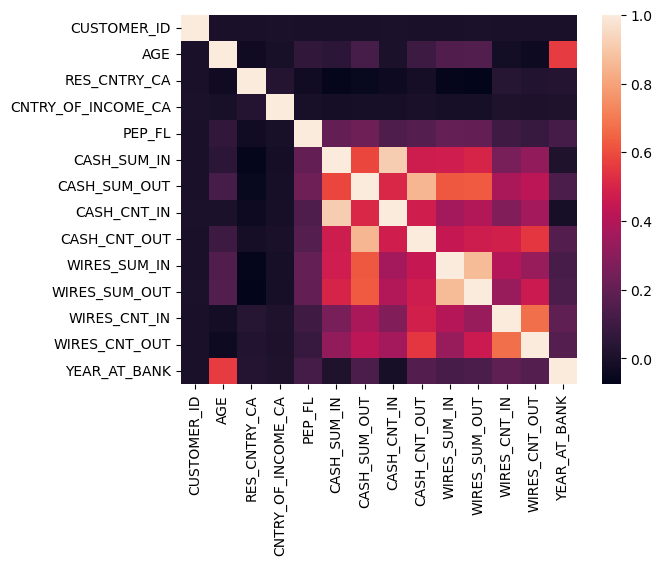

In [18]:
sns.heatmap(new_df.corr())

In [19]:
columns = ['AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_SUM_OUT', 'CASH_CNT_IN', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_IN', 'WIRES_CNT_OUT', 'YEAR_AT_BANK', 'RISK']
data = new_df[columns]

In [20]:
data

AGE  GENDER  RES_CNTRY_CA  CNTRY_OF_INCOME_CA  PEP_FL  CASH_SUM_IN  \
0        41  Female             1                   1     0.0     2577.785   
1        29    Male             1                   1     0.0     3035.502   
2        60    Male             1                   1     0.0     1617.571   
3        24  Female             1                   1     0.0     3587.042   
4        81  Female             1                   1     0.0     1725.524   
...     ...     ...           ...                 ...     ...          ...   
999995   84    Male             0                   1     0.0    18945.108   
999996   52    Male             0                   1     0.0     5775.601   
999997   64  Female             0                   1     0.0     2351.255   
999998   39    Male             0                   1     0.0    27312.613   
999999   61    Male             0                   0     0.0     1421.363   

        CASH_SUM_OUT  CASH_CNT_IN  CASH_CNT_OUT  WIRES_SUM_IN  WIRES_SUM_OUT  \
0           2851.663          2.0           7.0       70774.0        24244.0   
1           4805.997          2.0          15.0      282929.0       196439.0   
2           3482.809          1.0          11.0        7632.0        33598.0   
3           1940.943          5.0           8.0      149253.0       105896.0   
4          13197.169          2.0          43.0       92318.0       187403.0   
...              ...          ...           ...           ...            ...   
999995     32210.000         10.0          21.0     1186467.0      2550098.0   
999996      5015.741          7.0          15.0      244504.0       417992.0   
999997     15997.000          2.0          19.0     3024271.0       948981.0   
999998      3399.000          8.0           5.0      943477.0       376429.0   
999999      1276.000          1.0           1.0      683797.0       617628.0   

        WIRES_CNT_IN  WIRES_CNT_OUT  YEAR_AT_BANK  RISK  
0               62.0           35.0          15.0   low  
1               76.0          152.0           3.0   low  
2                6.0           20.0          11.0   low  
3               71.0          238.0          21.0   low  
4               96.0          180.0          10.0   low  
...              ...            ...           ...   ...  
999995          25.0          174.0          28.0  high  
999996          53.0          337.0          27.0   low  
999997          68.0          124.0          12.0  high  
999998           9.0           12.0          10.0  high  
999999           5.0           12.0           5.0  high  

[1000000 rows x 15 columns]

In [21]:
# Read in the UofT_edges.csv, it concludes the source customer id and target customer id and the emt amount. 
edges = pd.read_csv('UofT_edges.csv')
edges

source    target          emt
0       983859.0  544485.0   503.807815
1       605618.0  362627.0  5157.568486
2       323189.0  118238.0   498.628481
3       919153.0  983859.0   401.962668
4       995748.0  983859.0  5095.458776
...          ...       ...          ...
466228  743092.0  307628.0  2959.506391
466229  420266.0  489593.0   208.011081
466230  441447.0  877470.0  2221.199295
466231  444883.0  137297.0  1175.932049
466232  500103.0  123640.0   100.431608

[466233 rows x 3 columns]

In [22]:
# merging the emt data to the nodes dataset
edges['EMT_AVG_OUT'] = edges.groupby('source')['emt'].transform(lambda x: x.sum())
edges['EMT_AVG_IN'] = edges.groupby('target')['emt'].transform(lambda x: x.sum())
EMT_AVG_OUT = edges[['source', 'EMT_AVG_OUT']].drop_duplicates(keep='last')
EMT_AVG_IN = edges[['target', 'EMT_AVG_IN']].drop_duplicates(keep='last')
# adding emt_out
new_df = new_df.merge(EMT_AVG_OUT, left_on='CUSTOMER_ID',right_on = 'source', how='left').drop(columns = ['source'])
# adding emt_in
new_df = new_df.merge(EMT_AVG_IN, left_on='CUSTOMER_ID',right_on = 'target', how='left').drop(columns = ['target'])

In [23]:
# setting cnt == 0 to be 1 to avoid np.inf
new_df.loc[new_df['CASH_CNT_IN'] == 0, 'CASH_CNT_IN'] = 1
new_df.loc[new_df['CASH_CNT_OUT'] == 0, 'CASH_CNT_OUT'] = 1
new_df.loc[new_df['WIRES_CNT_IN'] == 0, 'WIRES_CNT_IN'] = 1
new_df.loc[new_df['WIRES_CNT_OUT'] == 0, 'WIRES_CNT_OUT'] = 1

In [24]:
# SUM/CNT
new_df['CASH_AVG_IN'] = new_df['CASH_SUM_IN'] / new_df['CASH_CNT_IN']
new_df['CASH_AVG_OUT'] = new_df['CASH_SUM_OUT'] / new_df['CASH_CNT_OUT']

new_df['WIRES_AVG_IN'] = new_df['WIRES_SUM_IN'] / new_df['WIRES_CNT_IN']
new_df['WIRES_AVG_OUT'] = new_df['WIRES_SUM_OUT'] / new_df['WIRES_CNT_OUT']

In [25]:
# 
new_df['CASH_TOTAL_IN'] = new_df['CASH_AVG_IN'] * new_df['CASH_CNT_IN']
new_df['CASH_TOTAL_OUT'] = new_df['CASH_AVG_OUT'] * new_df['CASH_CNT_OUT']

new_df['WIRES_TOTAL_IN'] = new_df['WIRES_AVG_IN'] * new_df['WIRES_CNT_IN']
new_df['WIRES_TOTAL_OUT'] = new_df['WIRES_AVG_OUT'] * new_df['WIRES_CNT_OUT']

In [26]:
# missing value in Total
new_df['CASH_TOTAL_IN'] = new_df['CASH_TOTAL_IN'].fillna(0)
new_df['CASH_TOTAL_OUT'] = new_df['CASH_TOTAL_OUT'].fillna(0)

new_df['WIRES_TOTAL_IN'] = new_df['WIRES_TOTAL_IN'].fillna(0)
new_df['WIRES_TOTAL_OUT'] = new_df['WIRES_TOTAL_OUT'].fillna(0)

In [27]:
new_df

CUSTOMER_ID                            NAME  AGE  GENDER  \
0          935382.0    Young, Marie Mildren Coleman   41  Female   
1            2305.0                Mark Stupar Lecy   29    Male   
2          472403.0      Dean Glasper Wendel Reeves   60    Male   
3          227994.0             Hulsey, Linda Rauth   24  Female   
4          418265.0      Carolyn Washington Roberts   81  Female   
...             ...                             ...  ...     ...   
999995     420884.0               Bret* Dove Gainey   84    Male   
999996     429418.0       Anthony Ray Montano Gomez   52    Male   
999997     731360.0  Bernadette Schofield Pace Mile   64  Female   
999998     837988.0         Wasson, Russell Terrell   39    Male   
999999     166357.0                Daniel Mckeighan   61    Male   

        RES_CNTRY_CA  CNTRY_OF_INCOME_CA  PEP_FL  CASH_SUM_IN  CASH_SUM_OUT  \
0                  1                   1     0.0     2577.785      2851.663   
1                  1                   1     0.0     3035.502      4805.997   
2                  1                   1     0.0     1617.571      3482.809   
3                  1                   1     0.0     3587.042      1940.943   
4                  1                   1     0.0     1725.524     13197.169   
...              ...                 ...     ...          ...           ...   
999995             0                   1     0.0    18945.108     32210.000   
999996             0                   1     0.0     5775.601      5015.741   
999997             0                   1     0.0     2351.255     15997.000   
999998             0                   1     0.0    27312.613      3399.000   
999999             0                   0     0.0     1421.363      1276.000   

        CASH_CNT_IN  ...  EMT_AVG_OUT   EMT_AVG_IN  CASH_AVG_IN  CASH_AVG_OUT  \
0               2.0  ...          NaN          NaN  1288.892500    407.380429   
1               2.0  ...          NaN          NaN  1517.751000    320.399800   
2               1.0  ...          NaN          NaN  1617.571000    316.619000   
3               5.0  ...          NaN          NaN   717.408400    242.617875   
4               2.0  ...          NaN          NaN   862.762000    306.910907   
...             ...  ...          ...          ...          ...           ...   
999995         10.0  ...  3418.392838  5002.493403  1894.510800   1533.809524   
999996          7.0  ...          NaN  2955.912041   825.085857    334.382733   
999997          2.0  ...  9927.441977  4287.453681  1175.627500    841.947368   
999998          8.0  ...   588.008938  9419.317616  3414.076625    679.800000   
999999          1.0  ...   104.990612  1968.843750  1421.363000   1276.000000   

         WIRES_AVG_IN WIRES_AVG_OUT CASH_TOTAL_IN CASH_TOTAL_OUT  \
0         1141.516129    692.685714      2577.785       2851.663   
1         3722.750000   1292.361842      3035.502       4805.997   
2         1272.000000   1679.900000      1617.571       3482.809   
3         2102.154930    444.941176      3587.042       1940.943   
4          961.645833   1041.127778      1725.524      13197.169   
...               ...           ...           ...            ...   
999995   47458.680000  14655.735632     18945.108      32210.000   
999996    4613.283019   1240.332344      5775.601       5015.741   
999997   44474.573529   7653.072581      2351.255      15997.000   
999998  104830.777778  31369.083333     27312.613       3399.000   
999999  136759.400000  51469.000000      1421.363       1276.000   

        WIRES_TOTAL_IN WIRES_TOTAL_OUT  
0              70774.0         24244.0  
1             282929.0        196439.0  
2               7632.0         33598.0  
3             149253.0        105896.0  
4              92318.0        187403.0  
...                ...             ...  
999995       1186467.0       2550098.0  
999996        244504.0        417992.0  
999997       3024271.0        948981.0  
999998        943477.0        376429.0  
9

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   CUSTOMER_ID             1000000 non-null  float64
 1   NAME                    999340 non-null   object 
 2   AGE                     1000000 non-null  int64  
 3   GENDER                  999372 non-null   object 
 4   RES_CNTRY_CA            1000000 non-null  int64  
 5   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 6   PEP_FL                  1000000 non-null  float64
 7   CASH_SUM_IN             1000000 non-null  float64
 8   CASH_SUM_OUT            1000000 non-null  float64
 9   CASH_CNT_IN             1000000 non-null  float64
 10  CASH_CNT_OUT            1000000 non-null  float64
 11  WIRES_SUM_IN            1000000 non-null  float64
 12  WIRES_SUM_OUT           1000000 non-null  float64
 13  WIRES_CNT_IN            1000000 non-null  float64
 14  WIR

## Logistic Regression (Inclue EMT)

In [29]:
cols = ['AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
logreg_df_1 = new_df[cols]

In [30]:
logreg_df_1.corr()

AGE  RES_CNTRY_CA  CNTRY_OF_INCOME_CA    PEP_FL  \
AGE                 1.000000     -0.033405           -0.007516  0.066775   
RES_CNTRY_CA       -0.033405      1.000000            0.029049 -0.026723   
CNTRY_OF_INCOME_CA -0.007516      0.029049            1.000000 -0.007470   
PEP_FL              0.066775     -0.026723           -0.007470  1.000000   
CASH_TOTAL_IN       0.049281     -0.063550           -0.015280  0.199309   
CASH_TOTAL_OUT      0.125492     -0.054083           -0.008478  0.226687   
WIRES_TOTAL_IN      0.149053     -0.066683           -0.008690  0.204057   
WIRES_TOTAL_OUT     0.155172     -0.075422           -0.010397  0.197912   
YEAR_AT_BANK        0.561424      0.026320            0.010660  0.119681   
EMT_AVG_IN          0.025181     -0.024697           -0.012123  0.088759   
EMT_AVG_OUT         0.029478     -0.027124           -0.014259  0.087438   

                    CASH_TOTAL_IN  CASH_TOTAL_OUT  WIRES_TOTAL_IN  \
AGE                      0.049281        0.125492        0.149053   
RES_CNTRY_CA            -0.063550       -0.054083       -0.066683   
CNTRY_OF_INCOME_CA      -0.015280       -0.008478       -0.008690   
PEP_FL                   0.199309        0.226687        0.204057   
CASH_TOTAL_IN            1.000000        0.586298        0.473499   
CASH_TOTAL_OUT           0.586298        1.000000        0.623890   
WIRES_TOTAL_IN           0.473499        0.623890        1.000000   
WIRES_TOTAL_OUT          0.499819        0.628060        0.864838   
YEAR_AT_BANK             0.009452        0.135128        0.126750   
EMT_AVG_IN               0.150240        0.105057        0.094260   
EMT_AVG_OUT              0.147635        0.106419        0.097111   

                    WIRES_TOTAL_OUT  YEAR_AT_BANK  EMT_AVG_IN  EMT_AVG_OUT  
AGE                        0.155172      0.561424    0.025181     0.029478  
RES_CNTRY_CA              -0.075422      0.026320   -0.024697    -0.027124  
CNTRY_OF_INCOME_CA        -0.010397      0.010660   -0.012123    -0.014259  
PEP_FL                     0.197912      0.119681    0.088759     0.087438  
CASH_TOTAL_IN              0.499819      0.009452    0.150240     0.147635  
CASH_TOTAL_OUT             0.628060      0.135128    0.105057     0.106419  
WIRES_TOTAL_IN             0.864838      0.126750    0.094260     0.097111  
WIRES_TOTAL_OUT            1.000000      0.137107    0.101012     0.105828  
YEAR_AT_BANK               0.137107      1.000000   -0.002521     0.000311  
EMT_AVG_IN                 0.101012     -0.002521    1.000000     0.176533  
EMT_AVG_OUT                0.105828      0.000311    0.176533     1.000000

<Axes: >

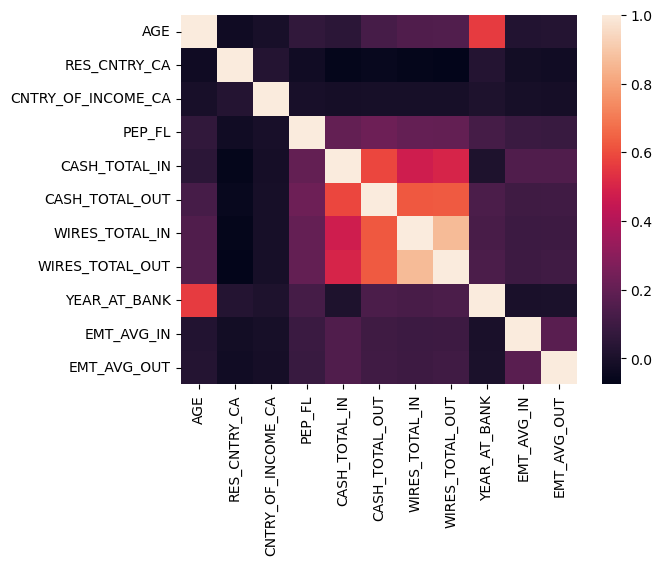

In [31]:
sns.heatmap(logreg_df_1.corr())

In [32]:
logreg_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  999372 non-null   object 
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  object 
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 7   occupation_risk         993616 non-null   object 
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            995822 non-null   float64
 13  EMT_AVG_IN              241285 non-null   float64
 14  EMT

In [33]:
gender = {'Female': 0, 'Male': 1}
logreg_df_1['GENDER'] = logreg_df_1['GENDER'].replace(gender)

In [34]:
risk_income = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_1['COUNTRY_RISK_INCOME'] = logreg_df_1['COUNTRY_RISK_INCOME'].replace(risk_income)

In [35]:
risk_residency = {'Low': 1, 'Medium': 2, 'High': 3}
logreg_df_1['COUNTRY_RISK_RESIDENCY'] = logreg_df_1['COUNTRY_RISK_RESIDENCY'].replace(risk_income)

In [36]:
risk_occupation = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].replace(risk_occupation)

In [37]:
logreg_df_1['EMT_AVG_IN'] = logreg_df_1['EMT_AVG_IN'].fillna(0)
logreg_df_1['EMT_AVG_OUT'] = logreg_df_1['EMT_AVG_OUT'].fillna(0)

In [38]:
logreg_df_1['YEAR_AT_BANK'] = logreg_df_1['YEAR_AT_BANK'].fillna(0)

In [39]:
logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].fillna(3)

In [40]:
logreg_df_1['GENDER'] = logreg_df_1['GENDER'].fillna(0 or 1)

In [41]:
logreg_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  1000000 non-null  float64
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  int64  
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  int64  
 7   occupation_risk         1000000 non-null  float64
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            1000000 non-null  float64
 13  EMT_AVG_IN              1000000 non-null  float64
 14  EMT

In [42]:
logreg_df_1['GENDER'] = logreg_df_1['GENDER'].astype('object')
logreg_df_1['RES_CNTRY_CA'] = logreg_df_1['RES_CNTRY_CA'].astype('object')
logreg_df_1['CNTRY_OF_INCOME_CA'] = logreg_df_1['CNTRY_OF_INCOME_CA'].astype('object')
logreg_df_1['PEP_FL'] = logreg_df_1['PEP_FL'].astype('object')
logreg_df_1['COUNTRY_RISK_INCOME'] = logreg_df_1['COUNTRY_RISK_INCOME'].astype('object')
logreg_df_1['COUNTRY_RISK_RESIDENCY'] = logreg_df_1['COUNTRY_RISK_RESIDENCY'].astype('object')
logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].astype('object')

In [43]:
logreg_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  1000000 non-null  object 
 2   RES_CNTRY_CA            1000000 non-null  object 
 3   CNTRY_OF_INCOME_CA      1000000 non-null  object 
 4   PEP_FL                  1000000 non-null  object 
 5   COUNTRY_RISK_INCOME     1000000 non-null  object 
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 7   occupation_risk         1000000 non-null  object 
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            1000000 non-null  float64
 13  EMT_AVG_IN              1000000 non-null  float64
 14  EMT

In [44]:
logreg_df_1.corr()

AGE  CASH_TOTAL_IN  CASH_TOTAL_OUT  WIRES_TOTAL_IN  \
AGE              1.000000       0.049281        0.125492        0.149053   
CASH_TOTAL_IN    0.049281       1.000000        0.586298        0.473499   
CASH_TOTAL_OUT   0.125492       0.586298        1.000000        0.623890   
WIRES_TOTAL_IN   0.149053       0.473499        0.623890        1.000000   
WIRES_TOTAL_OUT  0.155172       0.499819        0.628060        0.864838   
YEAR_AT_BANK     0.556471       0.009412        0.133903        0.125657   
EMT_AVG_IN       0.021368       0.129420        0.092852        0.083604   
EMT_AVG_OUT      0.023340       0.128248        0.093054        0.084687   

                 WIRES_TOTAL_OUT  YEAR_AT_BANK  EMT_AVG_IN  EMT_AVG_OUT  
AGE                     0.155172      0.556471    0.021368     0.023340  
CASH_TOTAL_IN           0.499819      0.009412    0.129420     0.128248  
CASH_TOTAL_OUT          0.628060      0.133903    0.092852     0.093054  
WIRES_TOTAL_IN          0.864838      0.125657    0.083604     0.084687  
WIRES_TOTAL_OUT         1.000000      0.135938    0.089467     0.090957  
YEAR_AT_BANK            0.135938      1.000000    0.000750     0.001785  
EMT_AVG_IN              0.089467      0.000750    1.000000     0.194446  
EMT_AVG_OUT             0.090957      0.001785    0.194446     1.000000

<Axes: >

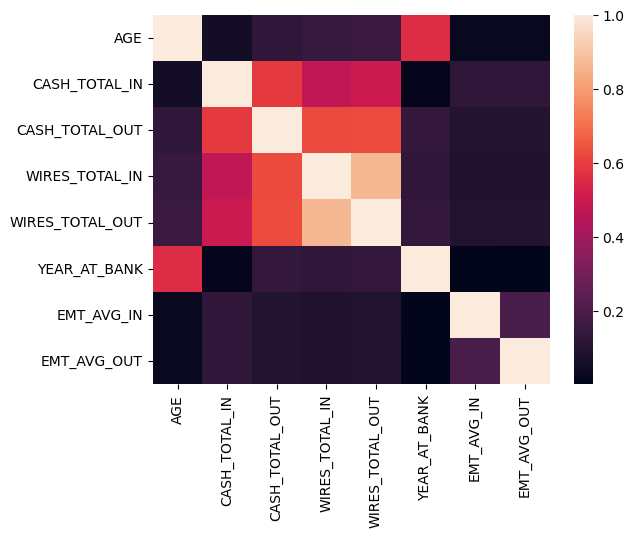

In [45]:
sns.heatmap(logreg_df_1.corr())

In [46]:
X = logreg_df_1.drop('RISK', axis = 1)
y = logreg_df_1['RISK']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

In [49]:
X_train

AGE GENDER RES_CNTRY_CA CNTRY_OF_INCOME_CA PEP_FL COUNTRY_RISK_INCOME  \
760648   43    0.0            1                  1    0.0                   1   
79333    69    0.0            1                  1    0.0                   1   
771344   13    0.0            1                  1    0.0                   1   
179102   35    1.0            1                  1    0.0                   1   
75318    31    0.0            1                  1    1.0                   1   
...     ...    ...          ...                ...    ...                 ...   
963395   66    0.0            1                  1    1.0                   1   
117952   66    1.0            1                  1    0.0                   1   
435829   57    1.0            1                  1    0.0                   1   
305711   32    1.0            1                  1    0.0                   1   
985772   33    0.0            0                  1    0.0                   1   

       COUNTRY_RISK_RESIDENCY occupation_risk  CASH_TOTAL_IN  CASH_TOTAL_OUT  \
760648                      1             1.0      18989.000         601.000   
79333                       1             3.0      41340.000       25282.000   
771344                      1             1.0        365.053        1094.643   
179102                      1             1.0        608.615        1863.578   
75318                       1             3.0       8548.000         271.000   
...                       ...             ...            ...             ...   
963395                      1             3.0       3839.000       25661.000   
117952                      1             3.0      10410.000       40294.000   
435829                      1             1.0      23928.000        1853.000   
305711                      1             1.0      38917.000       20034.000   
985772                      2             1.0       3850.288        1677.135   

        WIRES_TOTAL_IN  WIRES_TOTAL_OUT  YEAR_AT_BANK   EMT_AVG_IN  \
760648       1084928.0         123620.0           6.0   452.339002   
79333        9712373.0         563770.0          34.0     0.000000   
771344        246590.0          47306.0           4.0     0.000000   
179102        104925.0          38454.0          21.0     0.000000   
75318        2011167.0         500288.0          28.0  2960.223804   
...                ...              ...           ...          ...   
963395       3261926.0         931229.0          30.0     0.000000   
117952       4364108.0        5473745.0          24.0     0.000000   
435829       1022718.0         644589.0          32.0  2395.979130   
305711      14638614.0        8770942.0          10.0     0.000000   
985772        115160.0          10351.0           5.0     0.000000   

        EMT_AVG_OUT  
760648  1574.270068  
79333      0.000000  
771344     0.000000  
179102     0.000000  
75318   4285.575872  
...             ...  
963395     0.000000  
117952     0.000000  
435829  1539.144633  
305711     0.000000  
985772     0.000000  

[800000 rows x 15 columns]

In [50]:
y_train

760648    medium
79333     medium
771344       low
179102       low
75318     medium
           ...  
963395    medium
117952    medium
435829    medium
305711    medium
985772       low
Name: RISK, Length: 800000, dtype: object

In [51]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [52]:
y_pred = logreg.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)

In [54]:
accuracy

0.59864

## Logistic Regression(Exclude EMT)

In [55]:
cols = ['AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'RISK']
logreg_df_2 = new_df[cols]

In [56]:
logreg_df_2.corr()

AGE  RES_CNTRY_CA  CNTRY_OF_INCOME_CA    PEP_FL  \
AGE                 1.000000     -0.033405           -0.007516  0.066775   
RES_CNTRY_CA       -0.033405      1.000000            0.029049 -0.026723   
CNTRY_OF_INCOME_CA -0.007516      0.029049            1.000000 -0.007470   
PEP_FL              0.066775     -0.026723           -0.007470  1.000000   
CASH_TOTAL_IN       0.049281     -0.063550           -0.015280  0.199309   
CASH_TOTAL_OUT      0.125492     -0.054083           -0.008478  0.226687   
WIRES_TOTAL_IN      0.149053     -0.066683           -0.008690  0.204057   
WIRES_TOTAL_OUT     0.155172     -0.075422           -0.010397  0.197912   
YEAR_AT_BANK        0.561424      0.026320            0.010660  0.119681   

                    CASH_TOTAL_IN  CASH_TOTAL_OUT  WIRES_TOTAL_IN  \
AGE                      0.049281        0.125492        0.149053   
RES_CNTRY_CA            -0.063550       -0.054083       -0.066683   
CNTRY_OF_INCOME_CA      -0.015280       -0.008478       -0.008690   
PEP_FL                   0.199309        0.226687        0.204057   
CASH_TOTAL_IN            1.000000        0.586298        0.473499   
CASH_TOTAL_OUT           0.586298        1.000000        0.623890   
WIRES_TOTAL_IN           0.473499        0.623890        1.000000   
WIRES_TOTAL_OUT          0.499819        0.628060        0.864838   
YEAR_AT_BANK             0.009452        0.135128        0.126750   

                    WIRES_TOTAL_OUT  YEAR_AT_BANK  
AGE                        0.155172      0.561424  
RES_CNTRY_CA              -0.075422      0.026320  
CNTRY_OF_INCOME_CA        -0.010397      0.010660  
PEP_FL                     0.197912      0.119681  
CASH_TOTAL_IN              0.499819      0.009452  
CASH_TOTAL_OUT             0.628060      0.135128  
WIRES_TOTAL_IN             0.864838      0.126750  
WIRES_TOTAL_OUT            1.000000      0.137107  
YEAR_AT_BANK               0.137107      1.000000

<Axes: >

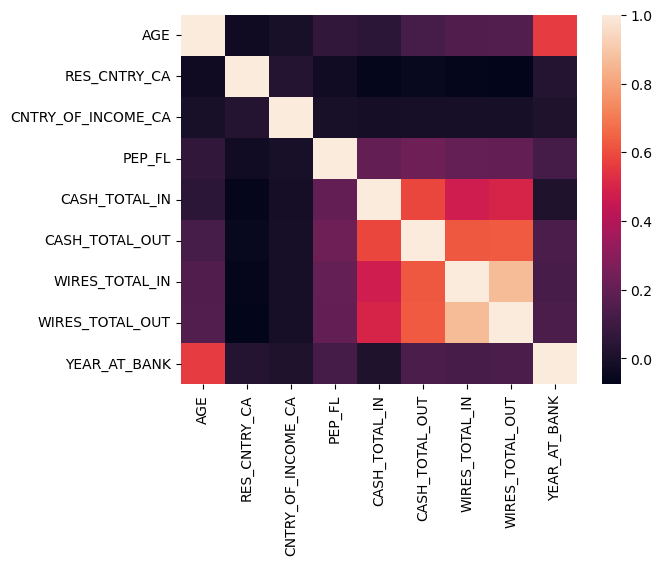

In [57]:
sns.heatmap(logreg_df_2.corr())

In [58]:
logreg_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  999372 non-null   object 
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  object 
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 7   occupation_risk         993616 non-null   object 
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            995822 non-null   float64
 13  RISK                    1000000 non-null  object 
dtypes: 

In [59]:
gender = {'Female': 0, 'Male': 1}
logreg_df_2['GENDER'] = logreg_df_2['GENDER'].replace(gender)

In [60]:
risk_income = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_2['COUNTRY_RISK_INCOME'] = logreg_df_2['COUNTRY_RISK_INCOME'].replace(risk_income)

In [61]:
risk_residency = {'Low': 1, 'Medium': 2, 'High': 3}
logreg_df_2['COUNTRY_RISK_RESIDENCY'] = logreg_df_2['COUNTRY_RISK_RESIDENCY'].replace(risk_income)

In [62]:
risk_occupation = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_2['occupation_risk'] = logreg_df_2['occupation_risk'].replace(risk_occupation)

In [63]:
logreg_df_2['YEAR_AT_BANK'] = logreg_df_2['YEAR_AT_BANK'].fillna(0)

In [64]:
logreg_df_2['occupation_risk'] = logreg_df_2['occupation_risk'].fillna(3)

In [65]:
logreg_df_2['GENDER'] = logreg_df_2['GENDER'].fillna(0 or 1)

In [66]:
logreg_df_2['GENDER'] = logreg_df_1['GENDER'].astype('object')
logreg_df_2['RES_CNTRY_CA'] = logreg_df_1['RES_CNTRY_CA'].astype('object')
logreg_df_2['CNTRY_OF_INCOME_CA'] = logreg_df_1['CNTRY_OF_INCOME_CA'].astype('object')
logreg_df_2['PEP_FL'] = logreg_df_1['PEP_FL'].astype('object')
logreg_df_2['COUNTRY_RISK_INCOME'] = logreg_df_1['COUNTRY_RISK_INCOME'].astype('object')
logreg_df_2['COUNTRY_RISK_RESIDENCY'] = logreg_df_1['COUNTRY_RISK_RESIDENCY'].astype('object')
logreg_df_2['occupation_risk'] = logreg_df_1['occupation_risk'].astype('object')

In [67]:
logreg_df_2

AGE GENDER RES_CNTRY_CA CNTRY_OF_INCOME_CA PEP_FL COUNTRY_RISK_INCOME  \
0        41    0.0            1                  1    0.0                   1   
1        29    1.0            1                  1    0.0                   1   
2        60    1.0            1                  1    0.0                   1   
3        24    0.0            1                  1    0.0                   1   
4        81    0.0            1                  1    0.0                   1   
...     ...    ...          ...                ...    ...                 ...   
999995   84    1.0            0                  1    0.0                   1   
999996   52    1.0            0                  1    0.0                   1   
999997   64    0.0            0                  1    0.0                   1   
999998   39    1.0            0                  1    0.0                   1   
999999   61    1.0            0                  0    0.0                   3   

       COUNTRY_RISK_RESIDENCY occupation_risk  CASH_TOTAL_IN  CASH_TOTAL_OUT  \
0                           1             3.0       2577.785        2851.663   
1                           1             3.0       3035.502        4805.997   
2                           1             3.0       1617.571        3482.809   
3                           1             3.0       3587.042        1940.943   
4                           1             3.0       1725.524       13197.169   
...                       ...             ...            ...             ...   
999995                      3             1.0      18945.108       32210.000   
999996                      1             1.0       5775.601        5015.741   
999997                      3             3.0       2351.255       15997.000   
999998                      3             3.0      27312.613        3399.000   
999999                      3             3.0       1421.363        1276.000   

        WIRES_TOTAL_IN  WIRES_TOTAL_OUT  YEAR_AT_BANK  RISK  
0              70774.0          24244.0          15.0   low  
1             282929.0         196439.0           3.0   low  
2               7632.0          33598.0          11.0   low  
3             149253.0         105896.0          21.0   low  
4              92318.0         187403.0          10.0   low  
...                ...              ...           ...   ...  
999995       1186467.0        2550098.0          28.0  high  
999996        244504.0         417992.0          27.0   low  
999997       3024271.0         948981.0          12.0  high  
999998        943477.0         376429.0          10.0  high  
999999        683797.0         617628.0           5.0  high  

[1000000 rows x 14 columns]

In [68]:
logreg_df_2.corr()

AGE  CASH_TOTAL_IN  CASH_TOTAL_OUT  WIRES_TOTAL_IN  \
AGE              1.000000       0.049281        0.125492        0.149053   
CASH_TOTAL_IN    0.049281       1.000000        0.586298        0.473499   
CASH_TOTAL_OUT   0.125492       0.586298        1.000000        0.623890   
WIRES_TOTAL_IN   0.149053       0.473499        0.623890        1.000000   
WIRES_TOTAL_OUT  0.155172       0.499819        0.628060        0.864838   
YEAR_AT_BANK     0.556471       0.009412        0.133903        0.125657   

                 WIRES_TOTAL_OUT  YEAR_AT_BANK  
AGE                     0.155172      0.556471  
CASH_TOTAL_IN           0.499819      0.009412  
CASH_TOTAL_OUT          0.628060      0.133903  
WIRES_TOTAL_IN          0.864838      0.125657  
WIRES_TOTAL_OUT         1.000000      0.135938  
YEAR_AT_BANK            0.135938      1.000000

<Axes: >

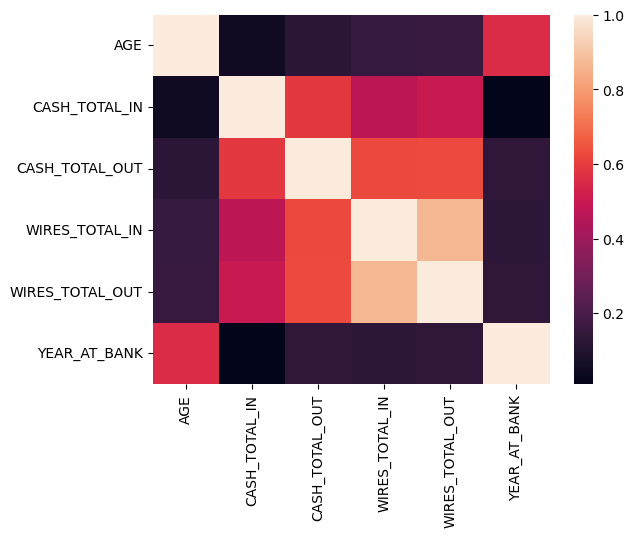

In [69]:
sns.heatmap(logreg_df_2.corr())

In [70]:
X = logreg_df_2.drop('RISK', axis = 1)
y = logreg_df_2['RISK']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

In [73]:
X_train

AGE GENDER RES_CNTRY_CA CNTRY_OF_INCOME_CA PEP_FL COUNTRY_RISK_INCOME  \
760648   43    0.0            1                  1    0.0                   1   
79333    69    0.0            1                  1    0.0                   1   
771344   13    0.0            1                  1    0.0                   1   
179102   35    1.0            1                  1    0.0                   1   
75318    31    0.0            1                  1    1.0                   1   
...     ...    ...          ...                ...    ...                 ...   
963395   66    0.0            1                  1    1.0                   1   
117952   66    1.0            1                  1    0.0                   1   
435829   57    1.0            1                  1    0.0                   1   
305711   32    1.0            1                  1    0.0                   1   
985772   33    0.0            0                  1    0.0                   1   

       COUNTRY_RISK_RESIDENCY occupation_risk  CASH_TOTAL_IN  CASH_TOTAL_OUT  \
760648                      1             1.0      18989.000         601.000   
79333                       1             3.0      41340.000       25282.000   
771344                      1             1.0        365.053        1094.643   
179102                      1             1.0        608.615        1863.578   
75318                       1             3.0       8548.000         271.000   
...                       ...             ...            ...             ...   
963395                      1             3.0       3839.000       25661.000   
117952                      1             3.0      10410.000       40294.000   
435829                      1             1.0      23928.000        1853.000   
305711                      1             1.0      38917.000       20034.000   
985772                      2             1.0       3850.288        1677.135   

        WIRES_TOTAL_IN  WIRES_TOTAL_OUT  YEAR_AT_BANK  
760648       1084928.0         123620.0           6.0  
79333        9712373.0         563770.0          34.0  
771344        246590.0          47306.0           4.0  
179102        104925.0          38454.0          21.0  
75318        2011167.0         500288.0          28.0  
...                ...              ...           ...  
963395       3261926.0         931229.0          30.0  
117952       4364108.0        5473745.0          24.0  
435829       1022718.0         644589.0          32.0  
305711      14638614.0        8770942.0          10.0  
985772        115160.0          10351.0           5.0  

[800000 rows x 13 columns]

In [74]:
y_train

760648    medium
79333     medium
771344       low
179102       low
75318     medium
           ...  
963395    medium
117952    medium
435829    medium
305711    medium
985772       low
Name: RISK, Length: 800000, dtype: object

In [75]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [76]:
y_pred = logreg.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)

In [78]:
accuracy

0.611335

## Decision Tree

In [79]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
DT_df = logreg_df_1[columns]

In [80]:
DT_df

AGE GENDER occupation_risk RES_CNTRY_CA CNTRY_OF_INCOME_CA  \
0        41    0.0             3.0            1                  1   
1        29    1.0             3.0            1                  1   
2        60    1.0             3.0            1                  1   
3        24    0.0             3.0            1                  1   
4        81    0.0             3.0            1                  1   
...     ...    ...             ...          ...                ...   
999995   84    1.0             1.0            0                  1   
999996   52    1.0             1.0            0                  1   
999997   64    0.0             3.0            0                  1   
999998   39    1.0             3.0            0                  1   
999999   61    1.0             3.0            0                  0   

       COUNTRY_RISK_RESIDENCY COUNTRY_RISK_INCOME PEP_FL  CASH_TOTAL_IN  \
0                           1                   1    0.0       2577.785   
1                           1                   1    0.0       3035.502   
2                           1                   1    0.0       1617.571   
3                           1                   1    0.0       3587.042   
4                           1                   1    0.0       1725.524   
...                       ...                 ...    ...            ...   
999995                      3                   1    0.0      18945.108   
999996                      1                   1    0.0       5775.601   
999997                      3                   1    0.0       2351.255   
999998                      3                   1    0.0      27312.613   
999999                      3                   3    0.0       1421.363   

        CASH_TOTAL_OUT  WIRES_TOTAL_IN  WIRES_TOTAL_OUT  YEAR_AT_BANK  \
0             2851.663         70774.0          24244.0          15.0   
1             4805.997        282929.0         196439.0           3.0   
2             3482.809          7632.0          33598.0          11.0   
3             1940.943        149253.0         105896.0          21.0   
4            13197.169         92318.0         187403.0          10.0   
...                ...             ...              ...           ...   
999995       32210.000       1186467.0        2550098.0          28.0   
999996        5015.741        244504.0         417992.0          27.0   
999997       15997.000       3024271.0         948981.0          12.0   
999998        3399.000        943477.0         376429.0          10.0   
999999        1276.000        683797.0         617628.0           5.0   

         EMT_AVG_IN  EMT_AVG_OUT  RISK  
0          0.000000     0.000000   low  
1          0.000000     0.000000   low  
2          0.000000     0.000000   low  
3          0.000000     0.000000   low  
4          0.000000     0.000000   low  
...             ...          ...   ...  
999995  5002.493403  3418.392838  high  
999996  2955.912041     0.000000   low  
999997  4287.453681  9927.441977  high  
999998  9419.317616   588.008938  high  
999999  1968.843750   104.990612  high  

[1000000 rows x 16 columns]

In [81]:
DT_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  1000000 non-null  object 
 2   occupation_risk         1000000 non-null  object 
 3   RES_CNTRY_CA            1000000 non-null  object 
 4   CNTRY_OF_INCOME_CA      1000000 non-null  object 
 5   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 6   COUNTRY_RISK_INCOME     1000000 non-null  object 
 7   PEP_FL                  1000000 non-null  object 
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            1000000 non-null  float64
 13  EMT_AVG_IN              1000000 non-null  float64
 14  EMT

In [82]:
X = DT_df.drop('RISK', axis = 1)
y = DT_df['RISK']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [93]:
clf = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)

[Text(0.5, 0.9166666666666666, 'x[10] <= 658392.5\ngini = 0.515\nsamples = 800000\nvalue = [39975, 479790, 280235]'),
 Text(0.25, 0.75, 'x[8] <= 17124.675\ngini = 0.071\nsamples = 496183\nvalue = [5425, 478161, 12597]'),
 Text(0.125, 0.5833333333333334, 'x[7] <= 0.5\ngini = 0.028\nsamples = 484482\nvalue = [1971, 477716, 4795]'),
 Text(0.0625, 0.4166666666666667, 'x[9] <= 25760.665\ngini = 0.017\nsamples = 481732\nvalue = [1220, 477716, 2796]'),
 Text(0.03125, 0.25, 'x[11] <= 731790.5\ngini = 0.012\nsamples = 480470\nvalue = [1022, 477665, 1783]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.009\nsamples = 479788\nvalue = [849, 477610, 1329]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.486\nsamples = 682\nvalue = [173, 55, 454]'),
 Text(0.09375, 0.25, 'x[9] <= 40826.0\ngini = 0.329\nsamples = 1262\nvalue = [198, 51, 1013]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.467\nsamples = 627\nvalue = [145, 51, 431]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.153\nsamples = 

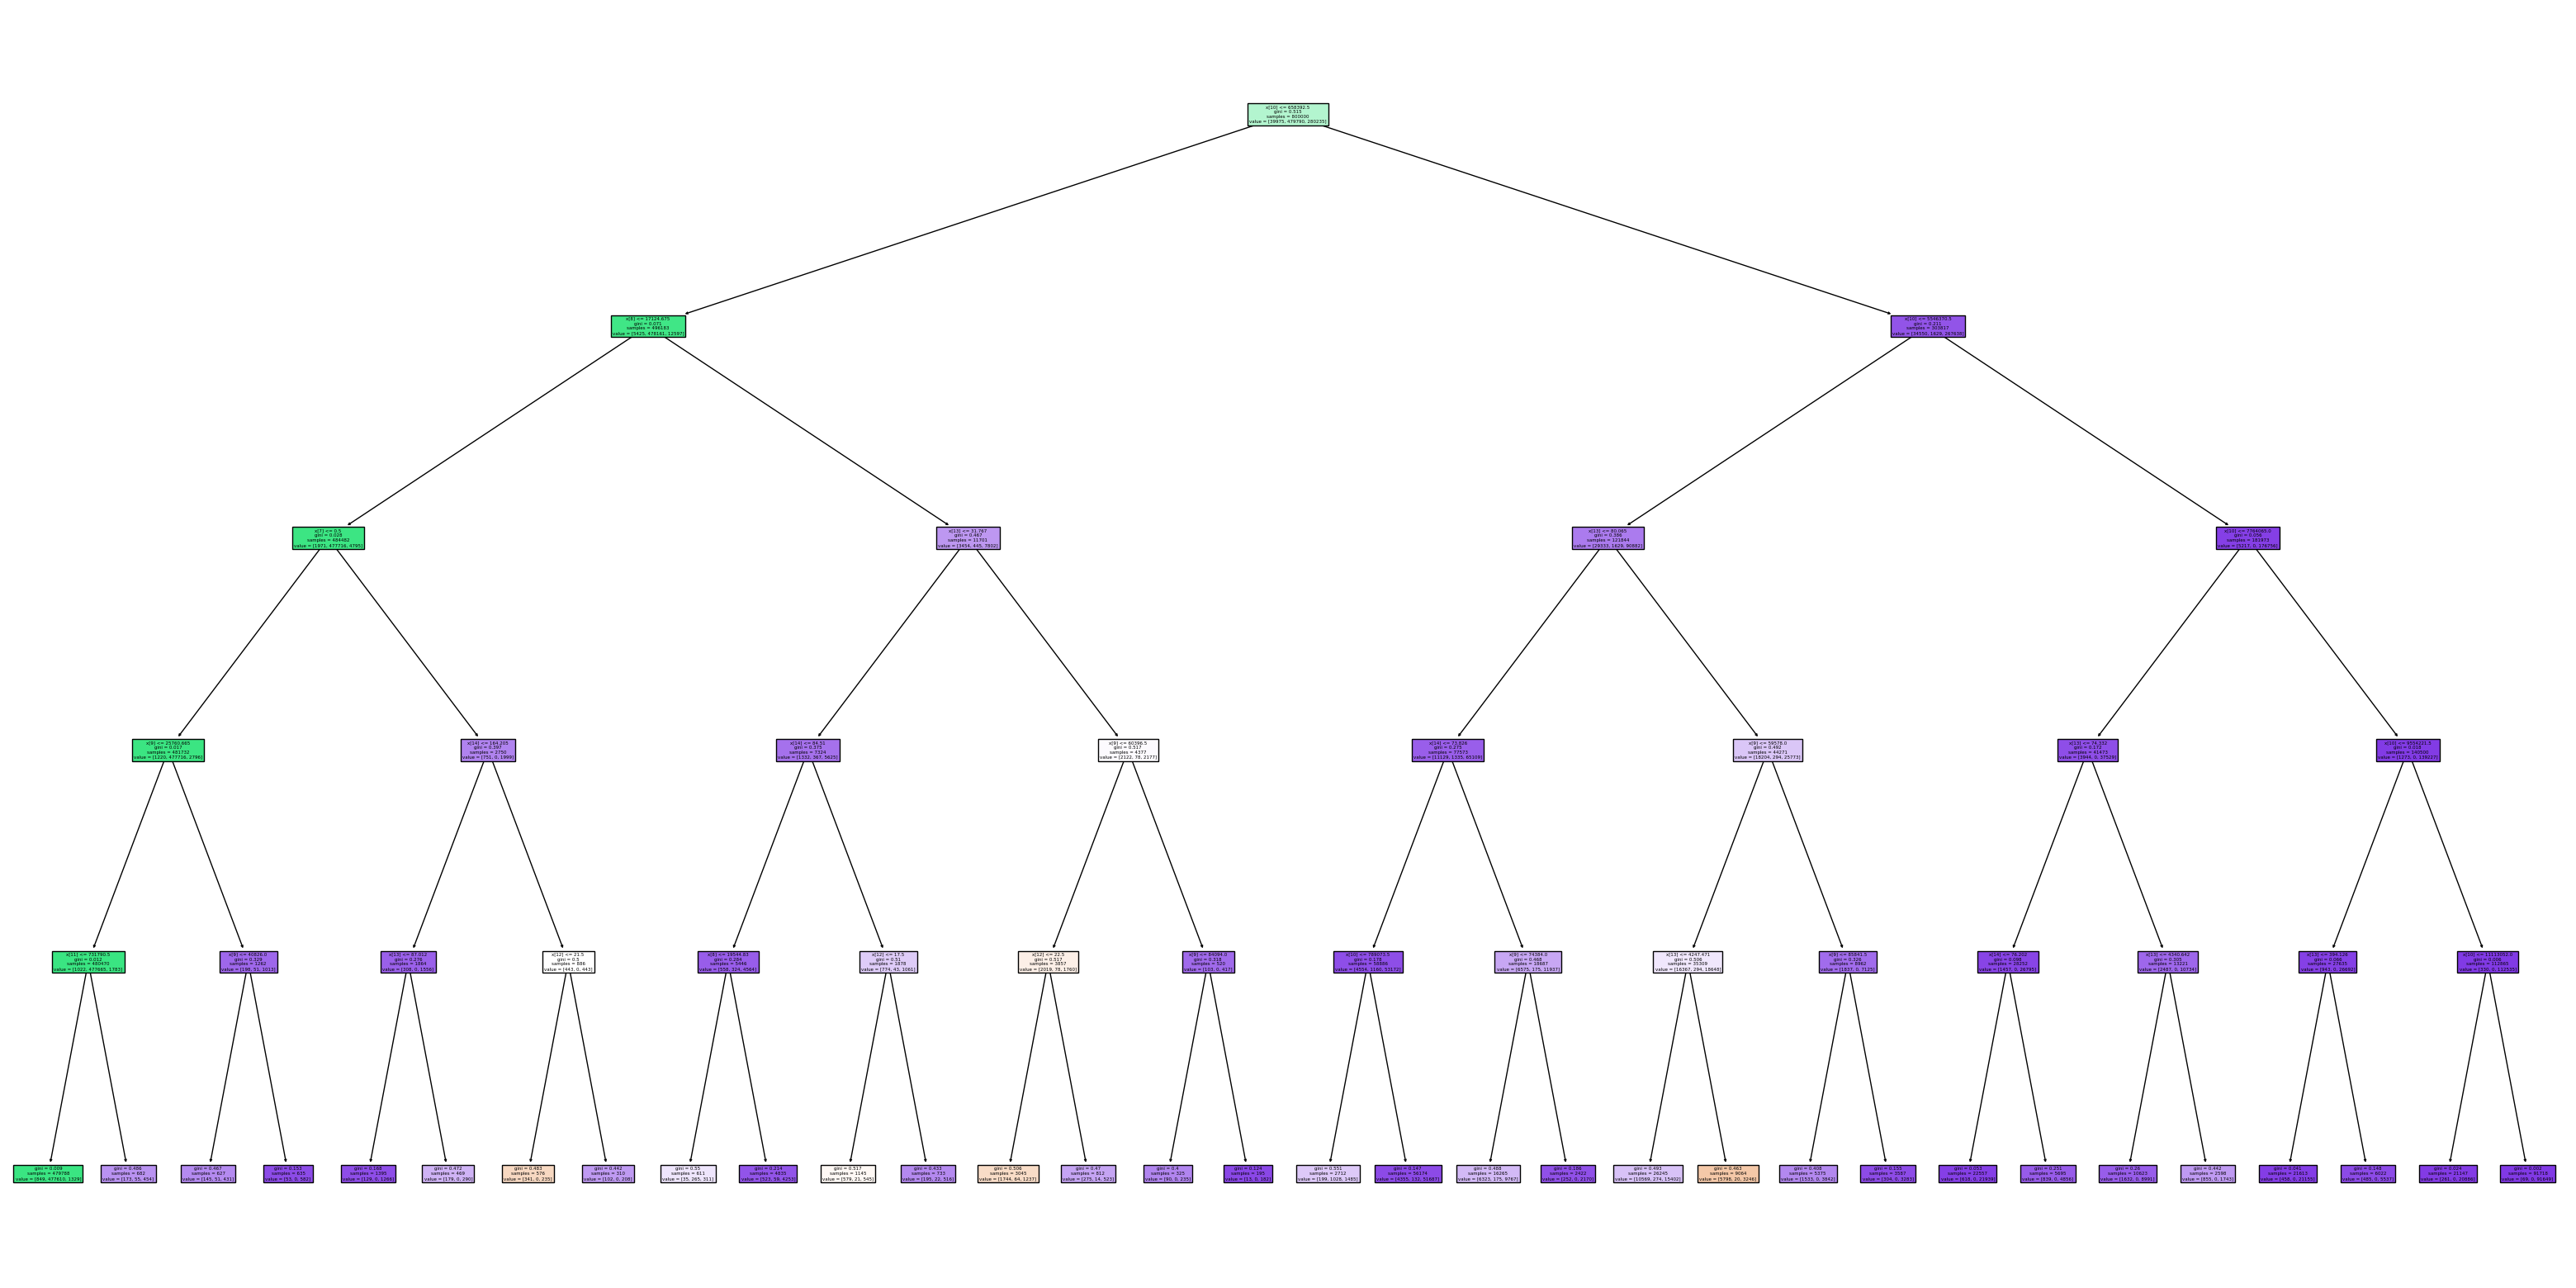

In [94]:
fig, ax = plt.subplots(figsize = (40, 20))
plot_tree(clf, filled = True, ax = ax)

In [95]:
y_pred = clf.predict(X_test)

In [96]:
accuracy = clf.score(X_test, y_test)

In [97]:
accuracy

0.949285

In [98]:
importances = clf.feature_importances_

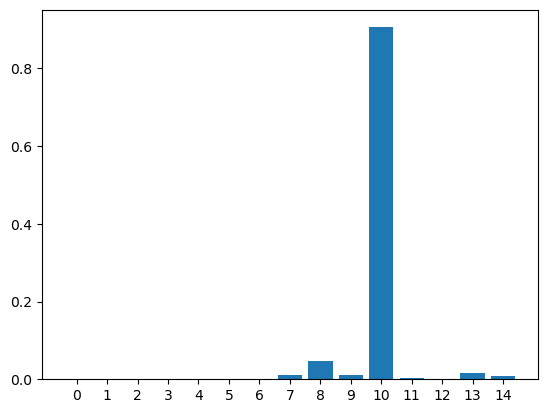

In [99]:
fig, ax = plt.subplots()
ax.bar(range(X.shape[1]), importances)
ax.set_xticks(range(X.shape[1]))

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

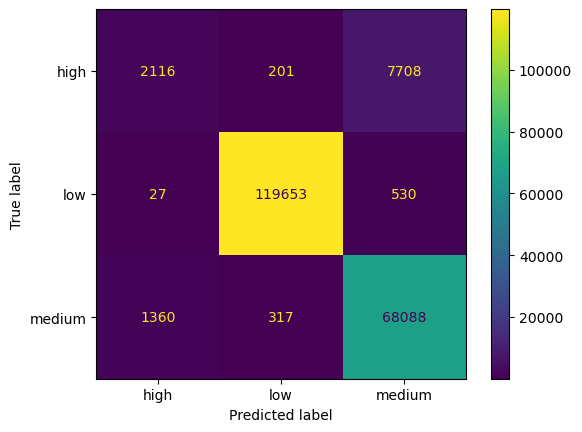

In [101]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Random Forest

In [102]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
RF_df = DT_df[columns]

In [103]:
X = RF_df.drop('RISK', axis = 1)
y = RF_df['RISK']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [105]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

In [106]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [107]:
y_pred = rf.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred)

In [109]:
accuracy

0.957085

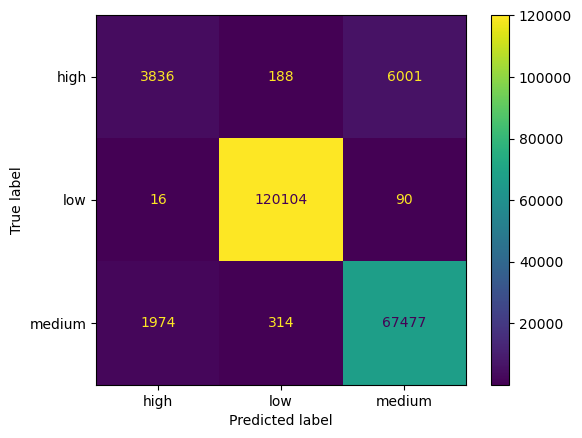

In [111]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot()
plt.show()

## Neural Network

In [112]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam

# from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers import Dropout

In [113]:
# there's in total 50000 high rish, 350000 medium risk and 600000 low risk, let's re-split the training data set
# so that they are evenly distributed.
train = pd.concat([logreg_df_1.query("RISK == 'low'")[0:30000],
                  logreg_df_1.query("RISK == 'medium'")[0:30000],
                  logreg_df_1.query("RISK == 'high'")[0:30000]], axis = 0)
test = pd.concat([logreg_df_1.query("RISK == 'low'")[30000:],
                  logreg_df_1.query("RISK == 'medium'")[30000:],
                  logreg_df_1.query("RISK == 'high'")[30000:]], axis = 0)

X_train = train.drop('RISK', axis = 1)
y_train = train['RISK']

X_test = test.drop('RISK', axis = 1)
y_test = test['RISK']

In [114]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(encoded_y)


X_train = np.asarray(X_train).astype(np.float64)

In [115]:
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_y = encoder.transform(y_test)

y_test = np_utils.to_categorical(encoded_y)


X_test = np.asarray(X_test).astype(np.float64)

In [ ]:
# model = Sequential()
# model.add(Dense(128, input_dim=15,activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(3, activation='softmax'))
# # Compile model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# #early_stopping_monitor = EarlyStopping(patience=3)
# model.fit(X_train, y_train, epochs=10, validation_split=0.2,batch_size = 10, verbose = 2)

In [116]:
def baseline_model():
    # create model
    model = Sequential()
#     model.add(Dense(128, input_dim=15,activation='relu'))
#     model.add(Dropout(0.25))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.25))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(3, activation='softmax'))

     # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=100, verbose=2)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Metal device set to: Apple M1 Pro
Epoch 1/10


2023-02-26 16:17:05.821488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-26 16:17:05.822180: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-26 16:17:05.948656: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 16:17:06.120802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 6s - loss: 137726.6719 - accuracy: 0.3700 - 6s/epoch - 7ms/step
Epoch 2/10
810/810 - 5s - loss: 2604.1277 - accuracy: 0.3742 - 5s/epoch - 6ms/step
Epoch 3/10
810/810 - 5s - loss: 454.9501 - accuracy: 0.3830 - 5s/epoch - 6ms/step
Epoch 4/10
810/810 - 5s - loss: 253.3776 - accuracy: 0.3668 - 5s/epoch - 6ms/step
Epoch 5/10
810/810 - 5s - loss: 184.2387 - accuracy: 0.3578 - 5s/epoch - 6ms/step
Epoch 6/10
810/810 - 5s - loss: 124.1514 - accuracy: 0.3571 - 5s/epoch - 6ms/step
Epoch 7/10
810/810 - 5s - loss: 67.9503 - accuracy: 0.3700 - 5s/epoch - 6ms/step
Epoch 8/10
810/810 - 5s - loss: 26.4947 - accuracy: 0.4658 - 5s/epoch - 6ms/step
Epoch 9/10
810/810 - 5s - loss: 7.8147 - accuracy: 0.5741 - 5s/epoch - 6ms/step
Epoch 10/10
810/810 - 5s - loss: 3.3146 - accuracy: 0.5597 - 5s/epoch - 6ms/step


2023-02-26 16:17:58.202658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 3.0301 - accuracy: 0.6119 - 579ms/epoch - 6ms/step
Epoch 1/10


2023-02-26 16:17:58.857504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 6s - loss: 85408.8672 - accuracy: 0.3932 - 6s/epoch - 7ms/step
Epoch 2/10
810/810 - 5s - loss: 1129.8563 - accuracy: 0.4273 - 5s/epoch - 7ms/step
Epoch 3/10
810/810 - 5s - loss: 223.8834 - accuracy: 0.4414 - 5s/epoch - 6ms/step
Epoch 4/10
810/810 - 5s - loss: 74.1690 - accuracy: 0.4384 - 5s/epoch - 6ms/step
Epoch 5/10
810/810 - 5s - loss: 36.3338 - accuracy: 0.4297 - 5s/epoch - 6ms/step
Epoch 6/10
810/810 - 5s - loss: 19.2527 - accuracy: 0.4202 - 5s/epoch - 6ms/step
Epoch 7/10
810/810 - 5s - loss: 11.6817 - accuracy: 0.3999 - 5s/epoch - 7ms/step
Epoch 8/10
810/810 - 5s - loss: 6.9126 - accuracy: 0.3839 - 5s/epoch - 6ms/step
Epoch 9/10
810/810 - 5s - loss: 4.4318 - accuracy: 0.3680 - 5s/epoch - 6ms/step
Epoch 10/10
810/810 - 5s - loss: 2.4923 - accuracy: 0.3589 - 5s/epoch - 6ms/step


2023-02-26 16:18:51.833071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 2.3470 - accuracy: 0.3756 - 568ms/epoch - 6ms/step
Epoch 1/10


2023-02-26 16:18:52.491355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 5s - loss: 89201.5078 - accuracy: 0.3975 - 5s/epoch - 7ms/step
Epoch 2/10
810/810 - 5s - loss: 1248.7876 - accuracy: 0.4286 - 5s/epoch - 6ms/step
Epoch 3/10
810/810 - 5s - loss: 243.5695 - accuracy: 0.4455 - 5s/epoch - 6ms/step
Epoch 4/10
810/810 - 5s - loss: 75.8290 - accuracy: 0.4477 - 5s/epoch - 6ms/step
Epoch 5/10
810/810 - 6s - loss: 33.2559 - accuracy: 0.4409 - 6s/epoch - 7ms/step
Epoch 6/10
810/810 - 5s - loss: 19.0649 - accuracy: 0.4233 - 5s/epoch - 7ms/step
Epoch 7/10
810/810 - 5s - loss: 11.0581 - accuracy: 0.4092 - 5s/epoch - 6ms/step
Epoch 8/10
810/810 - 5s - loss: 7.5903 - accuracy: 0.3935 - 5s/epoch - 6ms/step
Epoch 9/10
810/810 - 5s - loss: 4.6339 - accuracy: 0.3773 - 5s/epoch - 6ms/step
Epoch 10/10
810/810 - 5s - loss: 3.5557 - accuracy: 0.3636 - 5s/epoch - 6ms/step


2023-02-26 16:19:45.428964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 3.7257 - accuracy: 0.3730 - 568ms/epoch - 6ms/step
Epoch 1/10


2023-02-26 16:19:46.085475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 5s - loss: 87220.2578 - accuracy: 0.3940 - 5s/epoch - 7ms/step
Epoch 2/10
810/810 - 5s - loss: 1206.3684 - accuracy: 0.4299 - 5s/epoch - 6ms/step
Epoch 3/10
810/810 - 5s - loss: 218.8448 - accuracy: 0.4435 - 5s/epoch - 7ms/step
Epoch 4/10
810/810 - 5s - loss: 68.7641 - accuracy: 0.4411 - 5s/epoch - 6ms/step
Epoch 5/10
810/810 - 5s - loss: 33.9628 - accuracy: 0.4314 - 5s/epoch - 6ms/step
Epoch 6/10
810/810 - 5s - loss: 20.7901 - accuracy: 0.4210 - 5s/epoch - 6ms/step
Epoch 7/10
810/810 - 5s - loss: 12.9173 - accuracy: 0.4042 - 5s/epoch - 7ms/step
Epoch 8/10
810/810 - 5s - loss: 7.4317 - accuracy: 0.3879 - 5s/epoch - 7ms/step
Epoch 9/10
810/810 - 5s - loss: 4.7684 - accuracy: 0.3738 - 5s/epoch - 6ms/step
Epoch 10/10
810/810 - 5s - loss: 3.2980 - accuracy: 0.3624 - 5s/epoch - 7ms/step


2023-02-26 16:20:38.927392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 1.6495 - accuracy: 0.3674 - 583ms/epoch - 6ms/step
Epoch 1/10


2023-02-26 16:20:39.593355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 5s - loss: 86718.9062 - accuracy: 0.3952 - 5s/epoch - 7ms/step
Epoch 2/10
810/810 - 5s - loss: 1156.4816 - accuracy: 0.4335 - 5s/epoch - 7ms/step
Epoch 3/10
810/810 - 5s - loss: 231.6407 - accuracy: 0.4463 - 5s/epoch - 6ms/step
Epoch 4/10
810/810 - 5s - loss: 72.4849 - accuracy: 0.4467 - 5s/epoch - 6ms/step
Epoch 5/10
810/810 - 5s - loss: 31.2683 - accuracy: 0.4361 - 5s/epoch - 6ms/step
Epoch 6/10
810/810 - 5s - loss: 18.7036 - accuracy: 0.4263 - 5s/epoch - 6ms/step
Epoch 7/10
810/810 - 5s - loss: 12.3970 - accuracy: 0.4083 - 5s/epoch - 6ms/step
Epoch 8/10
810/810 - 5s - loss: 7.8490 - accuracy: 0.3885 - 5s/epoch - 6ms/step
Epoch 9/10
810/810 - 5s - loss: 4.6034 - accuracy: 0.3723 - 5s/epoch - 6ms/step
Epoch 10/10
810/810 - 5s - loss: 3.4268 - accuracy: 0.3612 - 5s/epoch - 6ms/step


2023-02-26 16:21:32.373397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 2.2492 - accuracy: 0.3589 - 577ms/epoch - 6ms/step
Epoch 1/10


2023-02-26 16:21:33.036081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 6s - loss: 84965.2422 - accuracy: 0.3931 - 6s/epoch - 7ms/step
Epoch 2/10
810/810 - 6s - loss: 1144.1147 - accuracy: 0.4221 - 6s/epoch - 7ms/step
Epoch 3/10
810/810 - 5s - loss: 204.5815 - accuracy: 0.4405 - 5s/epoch - 7ms/step
Epoch 4/10
810/810 - 5s - loss: 65.7179 - accuracy: 0.4353 - 5s/epoch - 7ms/step
Epoch 5/10
810/810 - 5s - loss: 33.0203 - accuracy: 0.4263 - 5s/epoch - 7ms/step
Epoch 6/10
810/810 - 5s - loss: 18.8235 - accuracy: 0.4149 - 5s/epoch - 7ms/step
Epoch 7/10
810/810 - 5s - loss: 11.8896 - accuracy: 0.4011 - 5s/epoch - 7ms/step
Epoch 8/10
810/810 - 5s - loss: 7.2748 - accuracy: 0.3836 - 5s/epoch - 7ms/step
Epoch 9/10
810/810 - 5s - loss: 4.3065 - accuracy: 0.3714 - 5s/epoch - 7ms/step
Epoch 10/10
810/810 - 5s - loss: 3.3188 - accuracy: 0.3613 - 5s/epoch - 7ms/step


2023-02-26 16:22:26.546111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 1.9339 - accuracy: 0.3566 - 575ms/epoch - 6ms/step
Epoch 1/10


2023-02-26 16:22:27.209794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 5s - loss: 86000.5781 - accuracy: 0.3951 - 5s/epoch - 7ms/step
Epoch 2/10
810/810 - 5s - loss: 1095.0087 - accuracy: 0.4295 - 5s/epoch - 7ms/step
Epoch 3/10
810/810 - 5s - loss: 212.1182 - accuracy: 0.4421 - 5s/epoch - 7ms/step
Epoch 4/10
810/810 - 5s - loss: 68.7644 - accuracy: 0.4378 - 5s/epoch - 7ms/step
Epoch 5/10
810/810 - 5s - loss: 35.0794 - accuracy: 0.4347 - 5s/epoch - 7ms/step
Epoch 6/10
810/810 - 5s - loss: 20.9278 - accuracy: 0.4222 - 5s/epoch - 7ms/step
Epoch 7/10
810/810 - 6s - loss: 13.0951 - accuracy: 0.4060 - 6s/epoch - 7ms/step
Epoch 8/10
810/810 - 6s - loss: 6.7990 - accuracy: 0.3912 - 6s/epoch - 7ms/step
Epoch 9/10
810/810 - 5s - loss: 5.1225 - accuracy: 0.3719 - 5s/epoch - 7ms/step
Epoch 10/10
810/810 - 5s - loss: 3.4909 - accuracy: 0.3596 - 5s/epoch - 7ms/step


2023-02-26 16:23:21.243415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 2.2242 - accuracy: 0.3790 - 585ms/epoch - 6ms/step
Epoch 1/10


2023-02-26 16:23:21.915416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 5s - loss: 87013.4844 - accuracy: 0.3902 - 5s/epoch - 7ms/step
Epoch 2/10
810/810 - 5s - loss: 1169.3676 - accuracy: 0.4252 - 5s/epoch - 7ms/step
Epoch 3/10
810/810 - 5s - loss: 230.1412 - accuracy: 0.4402 - 5s/epoch - 7ms/step
Epoch 4/10
810/810 - 5s - loss: 83.8598 - accuracy: 0.4375 - 5s/epoch - 7ms/step
Epoch 5/10
810/810 - 5s - loss: 38.0446 - accuracy: 0.4290 - 5s/epoch - 7ms/step
Epoch 6/10
810/810 - 5s - loss: 19.7778 - accuracy: 0.4208 - 5s/epoch - 7ms/step
Epoch 7/10
810/810 - 5s - loss: 10.8417 - accuracy: 0.4042 - 5s/epoch - 7ms/step
Epoch 8/10
810/810 - 5s - loss: 7.0574 - accuracy: 0.3884 - 5s/epoch - 7ms/step
Epoch 9/10
810/810 - 5s - loss: 4.2815 - accuracy: 0.3732 - 5s/epoch - 7ms/step
Epoch 10/10
810/810 - 5s - loss: 2.7722 - accuracy: 0.3623 - 5s/epoch - 7ms/step


2023-02-26 16:24:15.193488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 4.7252 - accuracy: 0.3670 - 585ms/epoch - 7ms/step
Epoch 1/10


2023-02-26 16:24:15.868509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 6s - loss: 86164.1016 - accuracy: 0.3928 - 6s/epoch - 7ms/step
Epoch 2/10
810/810 - 5s - loss: 1199.6862 - accuracy: 0.4241 - 5s/epoch - 7ms/step
Epoch 3/10
810/810 - 5s - loss: 225.8396 - accuracy: 0.4424 - 5s/epoch - 7ms/step
Epoch 4/10
810/810 - 5s - loss: 78.8155 - accuracy: 0.4430 - 5s/epoch - 7ms/step
Epoch 5/10
810/810 - 5s - loss: 42.7485 - accuracy: 0.4390 - 5s/epoch - 7ms/step
Epoch 6/10
810/810 - 5s - loss: 22.9254 - accuracy: 0.4326 - 5s/epoch - 7ms/step
Epoch 7/10
810/810 - 5s - loss: 13.6584 - accuracy: 0.4193 - 5s/epoch - 7ms/step
Epoch 8/10
810/810 - 5s - loss: 8.4787 - accuracy: 0.3984 - 5s/epoch - 7ms/step
Epoch 9/10
810/810 - 5s - loss: 5.0674 - accuracy: 0.3801 - 5s/epoch - 7ms/step
Epoch 10/10
810/810 - 5s - loss: 3.3884 - accuracy: 0.3654 - 5s/epoch - 7ms/step


2023-02-26 16:25:09.527770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 2.7939 - accuracy: 0.3631 - 583ms/epoch - 6ms/step
Epoch 1/10


2023-02-26 16:25:10.199023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


810/810 - 6s - loss: 87101.0859 - accuracy: 0.3938 - 6s/epoch - 7ms/step
Epoch 2/10
810/810 - 5s - loss: 1220.1339 - accuracy: 0.4313 - 5s/epoch - 7ms/step
Epoch 3/10
810/810 - 5s - loss: 215.8496 - accuracy: 0.4469 - 5s/epoch - 7ms/step
Epoch 4/10
810/810 - 6s - loss: 72.9568 - accuracy: 0.4428 - 6s/epoch - 7ms/step
Epoch 5/10
810/810 - 5s - loss: 35.5002 - accuracy: 0.4392 - 5s/epoch - 7ms/step
Epoch 6/10
810/810 - 5s - loss: 20.5031 - accuracy: 0.4262 - 5s/epoch - 7ms/step
Epoch 7/10
810/810 - 5s - loss: 14.8664 - accuracy: 0.4083 - 5s/epoch - 7ms/step
Epoch 8/10
810/810 - 5s - loss: 7.6338 - accuracy: 0.3909 - 5s/epoch - 7ms/step
Epoch 9/10
810/810 - 5s - loss: 5.8980 - accuracy: 0.3699 - 5s/epoch - 7ms/step
Epoch 10/10
810/810 - 5s - loss: 3.3578 - accuracy: 0.3590 - 5s/epoch - 7ms/step


2023-02-26 16:26:04.612248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 - 1s - loss: 2.0266 - accuracy: 0.3687 - 593ms/epoch - 7ms/step
Baseline: 39.21% (7.36%)


# Part 2:

Use 65 bad actors to generate a plausible risk as dependent variable. mechanism: bad actors -> risk = high (n = 65) customers who have transactions with bad actors -> risk = median (n = 49) others -> risk = low (1000000 - 65 - 49 = 999886) Use model decision tree (max_depth = 5) and random forest(n_estimators=16) Output: accuracy of decision tree = 0.99987; accuracy of random forest = 0.99987;

In [117]:
# Use 65 bad actors to generate a plausible risk as dependent variable. 
# output: a list of risk level, following nodes.csv index
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False
all_customer_id = {}
names = nodes[["CUSTOMER_ID", "NAME"]]
arr = names.to_numpy()
customer_id_arr = []
original_name_arr = []
for val in arr:
    all_customer_id.update({int(val[0]):"low"})
    customer_id_arr.append(int(val[0]))
    
    string_val = val[1]
    if(not isfloat(string_val)):
        string_val = ''.join([i for i in string_val if i.isalpha()])
    else:
        string_val = "nan"
    original_name_arr.append(string_val.lower())

    
original_name_arr
    
target_names_arr = pd.read_csv('final_matching_results.csv')
arr = target_names_arr.to_numpy()
sanction_name_list = []
# merge first and last name and remove birthday numbers 
for val in arr:
    string_val = val[0] + ' ' + val[1]
    string_val = ''.join([i for i in string_val if i.isalpha()])
    sanction_name_list.append(string_val.lower())
    
#target_name_list

# Get index of sanction names from the node arr
original_name_list = []
sanction_index_list_arr = []
for val in sanction_name_list:
    sanction_index_list_arr.append(original_name_arr.index(val))
	
	
# Find out customer id for saction list customers 
sanction_list_customer_id_arr = []
for val in sanction_index_list_arr:
    sanction_list_customer_id_arr.append(customer_id_arr[val])	
	
def istransact(arr, val):
    try:
        arr.index(val)
        return True
    except ValueError:
        return False
# all 0 at first
# 0 low risk, 1 medium risk, 2 high risk

transactions_arr = pd.read_csv('UofT_edges.csv')
arr = transactions_arr.to_numpy()
source_arr = arr[:,0].astype(int)
target_arr = arr[:,1].astype(int)

danger_source_arr = []

for i in range(len(source_arr)):
    source_id = source_arr[i]
    # if the source_id is inside the sanction list, if yes set the corresponding target to be medium risk
    if(istransact(sanction_list_customer_id_arr, source_id)):
        all_customer_id.update({target_arr[i]:"medium"})
        
for i in range(len(target_arr)):
    target_id = target_arr[i]
    # if the target_id is inside the sanction list, if yes set the corresponding source to be medium risk
    if(istransact(sanction_list_customer_id_arr, target_id)):
        all_customer_id.update({source_arr[i]:"medium"})

for val in sanction_list_customer_id_arr:
    all_customer_id.update({val:"high"})
	
risk_level = []
for val in customer_id_arr:
    risk_level.append(all_customer_id[val])	
    	
	

## Decision Tree by using Predict bad actor risk as dependent# 

In [118]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
DT_df = logreg_df_1[columns]
X = DT_df.drop('RISK', axis = 1)
y = risk_level

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [120]:
clf_bad_actor = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)

[Text(0.7132352941176471, 0.9166666666666666, 'x[10] <= 39220036.0\ngini = 0.0\nsamples = 800000\nvalue = [50, 799912, 38]'),
 Text(0.5441176470588235, 0.75, 'x[13] <= 22065.213\ngini = 0.0\nsamples = 799904\nvalue = [49, 799817, 38]'),
 Text(0.38235294117647056, 0.5833333333333334, 'x[13] <= 751.288\ngini = 0.0\nsamples = 799756\nvalue = [49, 799670, 37]'),
 Text(0.23529411764705882, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.0\nsamples = 685384\nvalue = [44, 685326, 14]'),
 Text(0.11764705882352941, 0.25, 'x[14] <= 11058.562\ngini = 0.0\nsamples = 375887\nvalue = [6, 375873, 8]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 374732\nvalue = [6, 374720, 6]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.003\nsamples = 1155\nvalue = [0, 1153, 2]'),
 Text(0.35294117647058826, 0.25, 'x[9] <= 199310.0\ngini = 0.0\nsamples = 309497\nvalue = [38, 309453, 6]'),
 Text(0.29411764705882354, 0.08333333333333333, 'gini = 0.0\nsamples = 309168\nvalue = [37, 

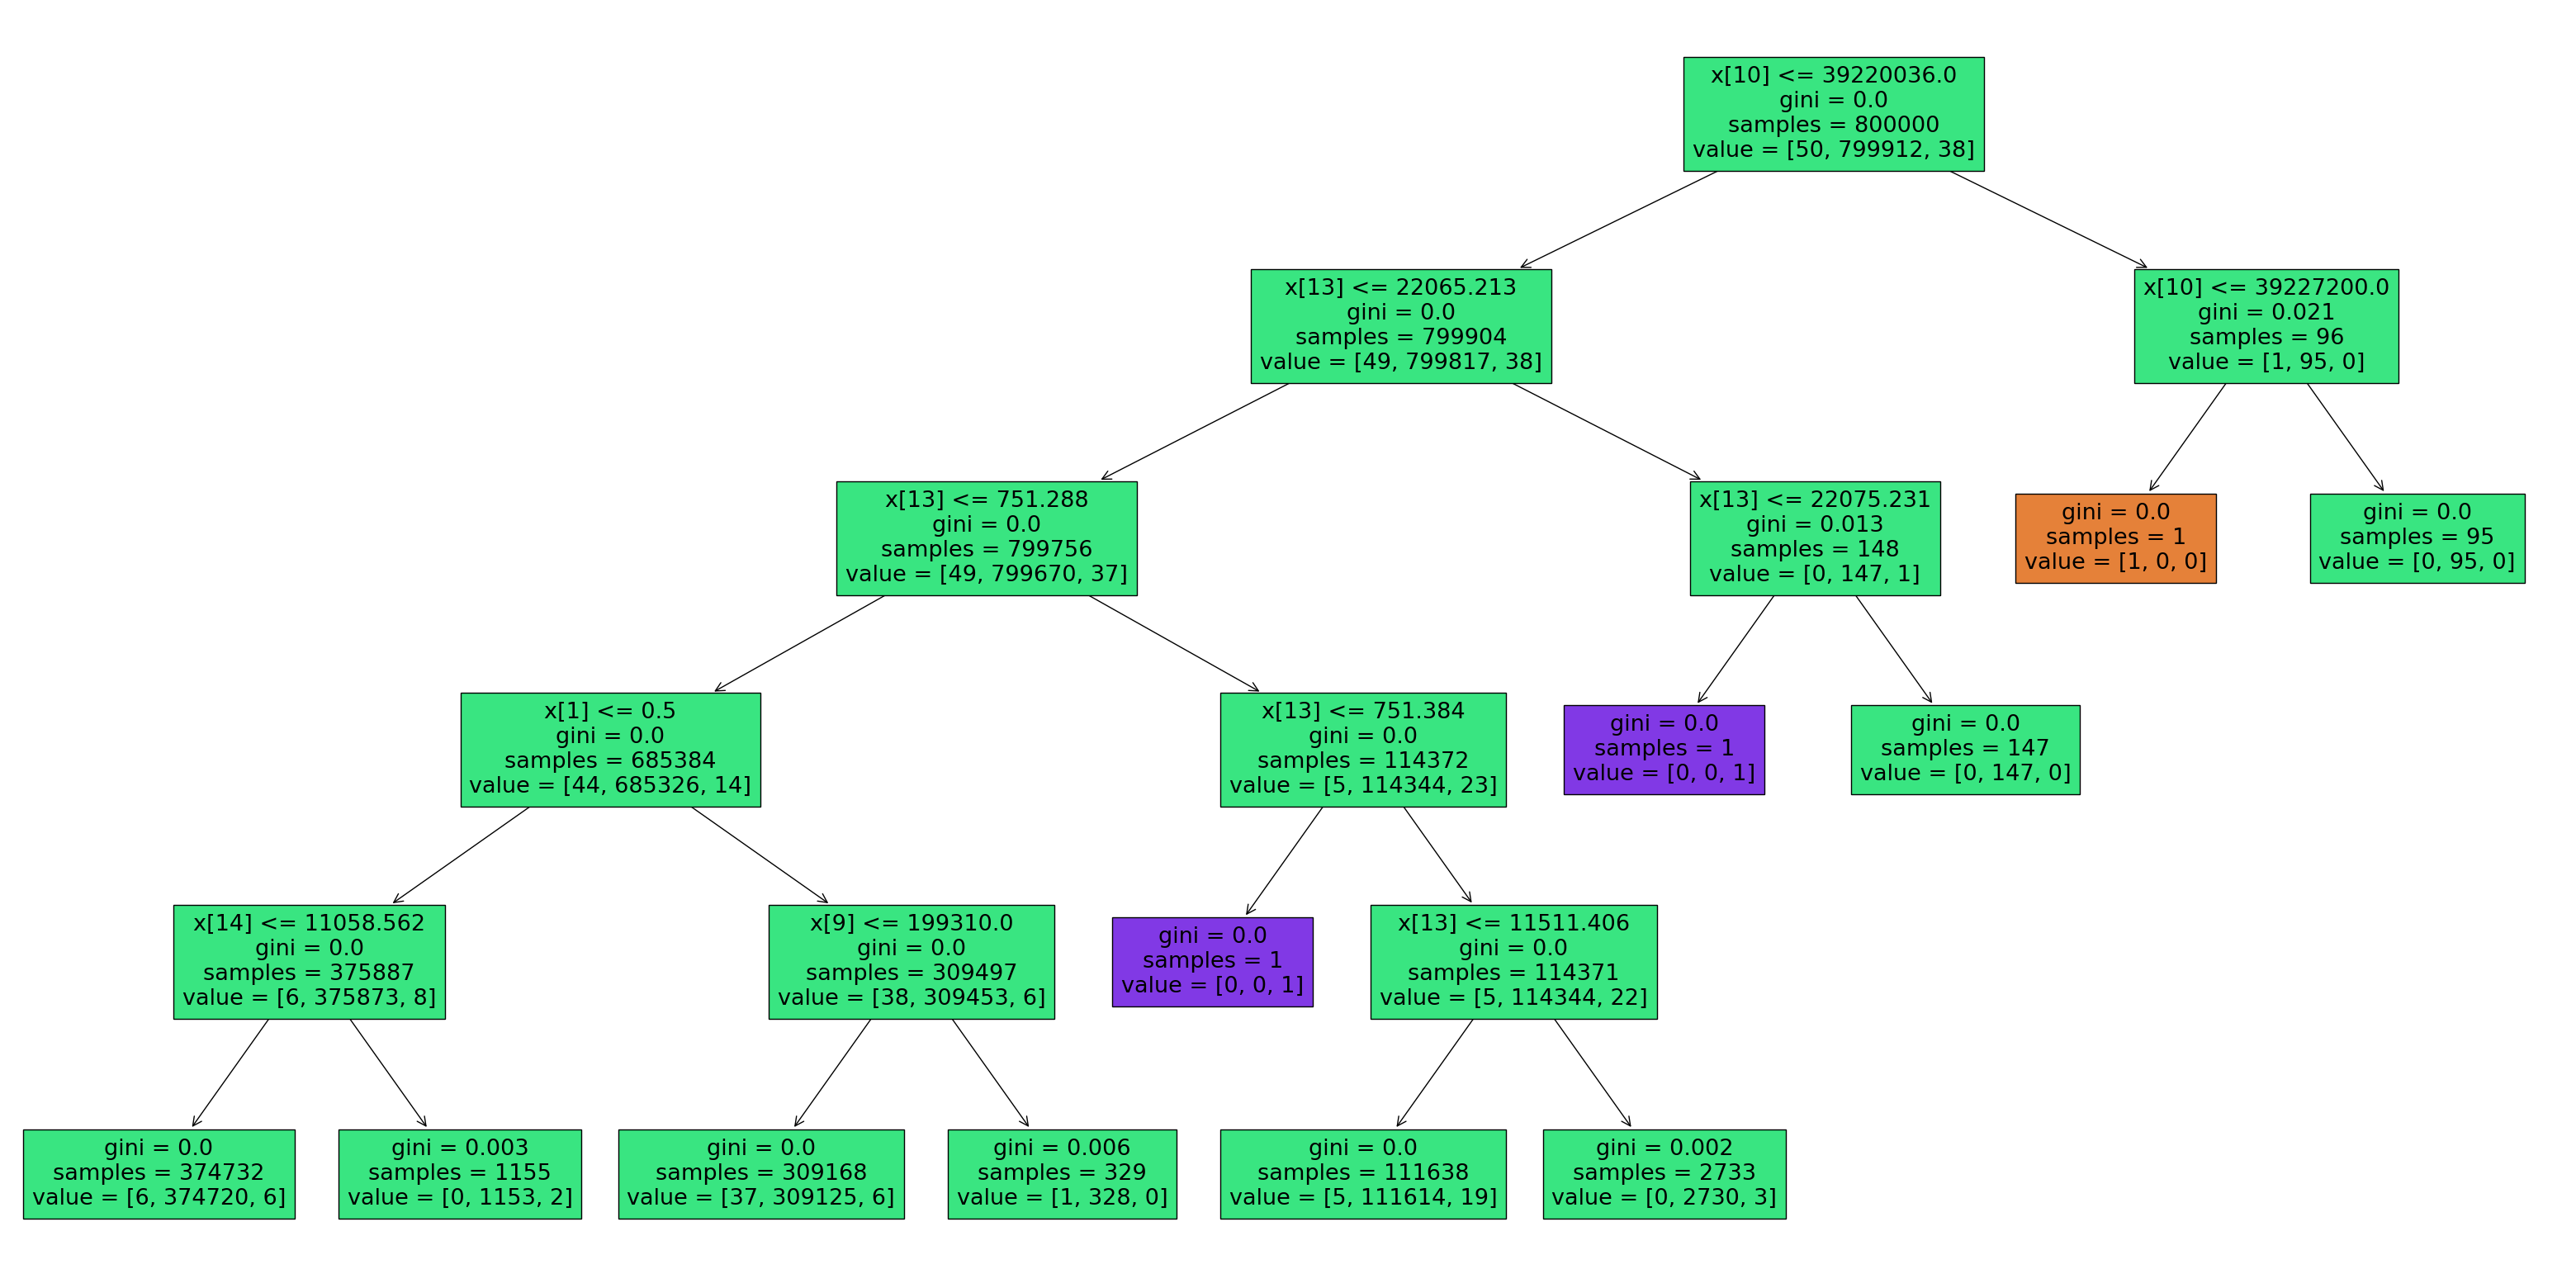

In [121]:
fig, ax = plt.subplots(figsize = (40, 20))
plot_tree(clf_bad_actor, filled = True, ax = ax)

In [122]:
# accuracy
y_pred = clf_bad_actor.predict(X_test)
accuracy = clf_bad_actor.score(X_test, y_test)
accuracy

0.99987

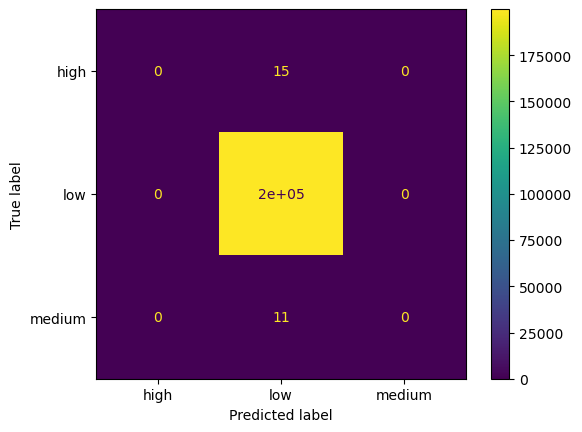

In [125]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(cm, display_labels=clf_bad_actor.classes_)
disp.plot()
plt.show()

# Random Forest by Bad Actor

In [126]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
RF_df = DT_df[columns]
X = RF_df.drop('RISK', axis = 1)
y = risk_level

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
rf = RandomForestClassifier(n_estimators = 16, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=16, random_state=1)

In [128]:
# accuracy:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.99987

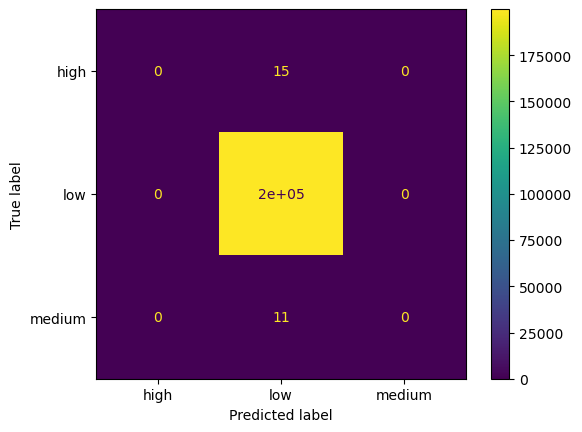

In [130]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot()
plt.show()